# Rainfall Prediction - Weather Forecasting

### 1.Dataset loading

In [74]:
import pandas as pd
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [78]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')

In [81]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


Dataset Description:

Number of columns: 23


Date  - The date of observation

Location  -The common name of the location of the weather station

MinTemp  -The minimum temperature in degrees celsius

MaxTemp -The maximum temperature in degrees celsius

Rainfall  -The amount of rainfall recorded for the day in mm

Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am

Sunshine  -The number of hours of bright sunshine in the day.

WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight

WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight

WindDir9am -Direction of the wind at 9am

WindDir3pm -Direction of the wind at 3pm

WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am

WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm

Humidity9am -Humidity (percent) at 9am

Humidity3pm -Humidity (percent) at 3pm

Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am

Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm

Cloud9am - Fraction of sky obscured by cloud at 9am. 

Cloud3pm -Fraction of sky obscured by cloud 

Temp9am-Temperature (degrees C) at 9am

Temp3pm -Temperature (degrees C) at 3pm

RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".

In [83]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8350.000000,8365.000000,8185.000000,4913.000000,4431.000000,7434.000000,8349.000000,8318.000000,8366.000000,8323.000000,7116.000000,7113.000000,6004.000000,5970.000000,8369.000000,8329.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934
std,5.403596,6.136408,10.459379,5.044484,3.896235,14.665721,10.174579,9.766986,16.833283,18.423774,6.828699,6.766681,2.877658,2.731659,5.627035,5.980020
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.200000,19.300000,0.000000,2.600000,4.750000,30.000000,6.000000,11.000000,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.000000
50%,13.300000,23.300000,0.000000,4.600000,8.700000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.800000,21.900000
75%,17.400000,28.000000,1.000000,7.000000,10.700000,50.000000,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


In [85]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

inference:
    
    i) There are missing values in the dataset

    ii)Dataset includes numeric and categorical values

In [87]:
# fill missing values using mode of the categorical column

df['WindGustDir'] = df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])
df['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])
df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])
df['RainTomorrow'] = df['RainTomorrow'].fillna(df['RainTomorrow'].mode()[0])
df['RainToday'] = df['RainToday'].fillna(df['RainToday'].mode()[0])

In [89]:
# Get list of neumeric variables
t = (df.dtypes == "float64")
num_cols = list(t[t].index)

print("Neumeric variables:")
print(num_cols)

Neumeric variables:
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [91]:
# Filling missing values with mean of the column in value

for i in num_cols:
    df[i].fillna(df[i].mean(), inplace=True)
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8425 non-null   float64
 3   MaxTemp        8425 non-null   float64
 4   Rainfall       8425 non-null   float64
 5   Evaporation    8425 non-null   float64
 6   Sunshine       8425 non-null   float64
 7   WindGustDir    8425 non-null   object 
 8   WindGustSpeed  8425 non-null   float64
 9   WindDir9am     8425 non-null   object 
 10  WindDir3pm     8425 non-null   object 
 11  WindSpeed9am   8425 non-null   float64
 12  WindSpeed3pm   8425 non-null   float64
 13  Humidity9am    8425 non-null   float64
 14  Humidity3pm    8425 non-null   float64
 15  Pressure9am    8425 non-null   float64
 16  Pressure3pm    8425 non-null   float64
 17  Cloud9am       8425 non-null   float64
 18  Cloud3pm

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8425 non-null   float64
 3   MaxTemp        8425 non-null   float64
 4   Rainfall       8425 non-null   float64
 5   Evaporation    8425 non-null   float64
 6   Sunshine       8425 non-null   float64
 7   WindGustDir    8425 non-null   object 
 8   WindGustSpeed  8425 non-null   float64
 9   WindDir9am     8425 non-null   object 
 10  WindDir3pm     8425 non-null   object 
 11  WindSpeed9am   8425 non-null   float64
 12  WindSpeed3pm   8425 non-null   float64
 13  Humidity9am    8425 non-null   float64
 14  Humidity3pm    8425 non-null   float64
 15  Pressure9am    8425 non-null   float64
 16  Pressure3pm    8425 non-null   float64
 17  Cloud9am       8425 non-null   float64
 18  Cloud3pm

In [95]:
df['Date']

0       2008-12-01
1       2008-12-02
2       2008-12-03
3       2008-12-04
4       2008-12-05
           ...    
8420    2017-06-21
8421    2017-06-22
8422    2017-06-23
8423    2017-06-24
8424    2017-06-25
Name: Date, Length: 8425, dtype: object

In [96]:
# new data frame with split value columns
new = df["Date"].str.split("-", n = 1, expand = True)


df["Year"]= new[0]

df["Month"]= new[1]
#df["year"]= new[2]

new2 = df["Month"].str.split("-", n = 1, expand = True)

df["Month"]= new2[0]
df["date"]= new2[1]

df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,date
0,2008-12-01,Albury,13.4,22.900000,0.6,5.389395,7.632205,W,44.000000,W,...,1007.1,8.000000,4.503183,16.9,21.8,No,No,2008,12,01
1,2008-12-02,Albury,7.4,25.100000,0.0,5.389395,7.632205,WNW,44.000000,NNW,...,1007.8,4.566622,4.503183,17.2,24.3,No,No,2008,12,02
2,2008-12-03,Albury,12.9,25.700000,0.0,5.389395,7.632205,WSW,46.000000,W,...,1008.7,4.566622,2.000000,21.0,23.2,No,No,2008,12,03
3,2008-12-04,Albury,9.2,28.000000,0.0,5.389395,7.632205,NE,24.000000,SE,...,1012.8,4.566622,4.503183,18.1,26.5,No,No,2008,12,04
4,2008-12-05,Albury,17.5,32.300000,1.0,5.389395,7.632205,W,41.000000,ENE,...,1006.0,7.000000,8.000000,17.8,29.7,No,No,2008,12,05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.400000,0.0,5.389395,7.632205,E,31.000000,SE,...,1020.3,4.566622,4.503183,10.1,22.4,No,No,2017,06,21
8421,2017-06-22,Uluru,3.6,25.300000,0.0,5.389395,7.632205,NNW,22.000000,SE,...,1019.1,4.566622,4.503183,10.9,24.5,No,No,2017,06,22
8422,2017-06-23,Uluru,5.4,26.900000,0.0,5.389395,7.632205,N,37.000000,SE,...,1016.8,4.566622,4.503183,12.5,26.1,No,No,2017,06,23
8423,2017-06-24,Uluru,7.8,27.000000,0.0,5.389395,7.632205,SE,28.000000,SSE,...,1016.5,3.000000,2.000000,15.1,26.0,No,No,2017,06,24


In [97]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Year             0
Month            0
date             0
dtype: int64

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8425 non-null   float64
 3   MaxTemp        8425 non-null   float64
 4   Rainfall       8425 non-null   float64
 5   Evaporation    8425 non-null   float64
 6   Sunshine       8425 non-null   float64
 7   WindGustDir    8425 non-null   object 
 8   WindGustSpeed  8425 non-null   float64
 9   WindDir9am     8425 non-null   object 
 10  WindDir3pm     8425 non-null   object 
 11  WindSpeed9am   8425 non-null   float64
 12  WindSpeed3pm   8425 non-null   float64
 13  Humidity9am    8425 non-null   float64
 14  Humidity3pm    8425 non-null   float64
 15  Pressure9am    8425 non-null   float64
 16  Pressure3pm    8425 non-null   float64
 17  Cloud9am       8425 non-null   float64
 18  Cloud3pm

### 2.EDA

In [99]:
for i in df.columns:
  print(df[i].value_counts())
  print("-------------------------------")

2011-06-08    5
2011-02-10    5
2011-05-21    5
2011-05-10    5
2011-03-21    5
             ..
2013-05-14    1
2013-05-12    1
2012-11-29    1
2012-11-22    1
2012-11-23    1
Name: Date, Length: 3004, dtype: int64
-------------------------------
Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64
-------------------------------
 13.193305    75
 12.000000    74
 13.200000    71
 13.800000    69
 12.700000    68
              ..
 26.900000     1
-1.700000      1
-1.400000      1
-1.200000      1
-0.800000      1
Name: MinTemp, Length: 286, dtype: int64
-------------------------------
19.0    87
23.8    75
19.8    74
25.0    71
22.3    68
        ..
44.9     1
10.0     1
43.1     1
40.6     1
10.7     1
Name: MaxTemp, Length: 332, dtype: int64
------------------

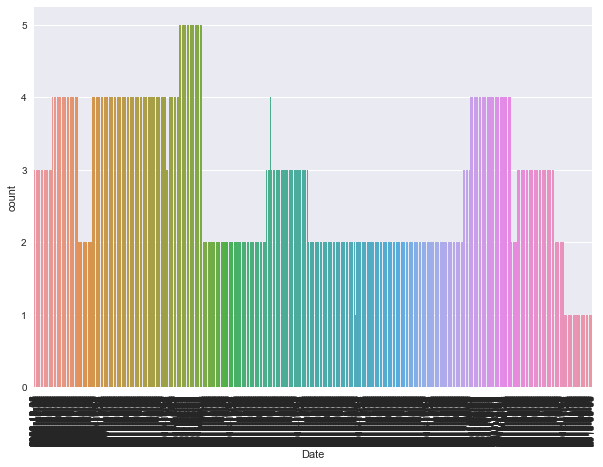

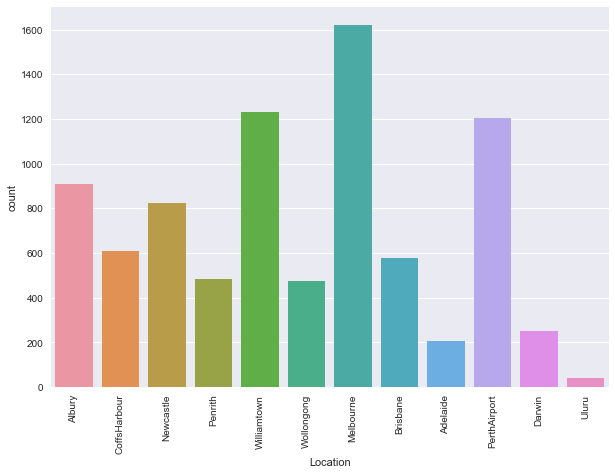

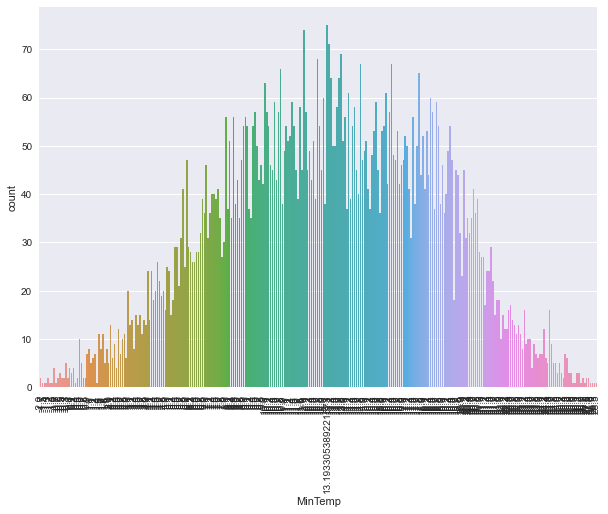

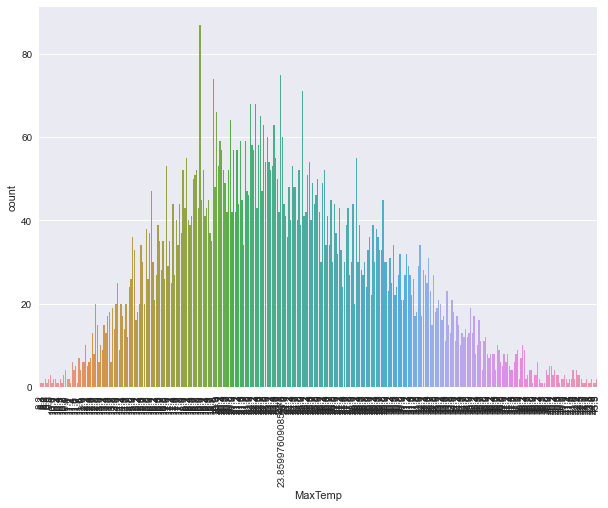

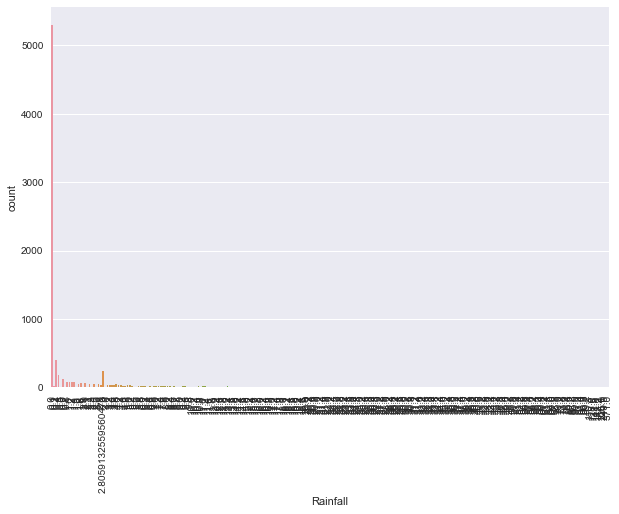

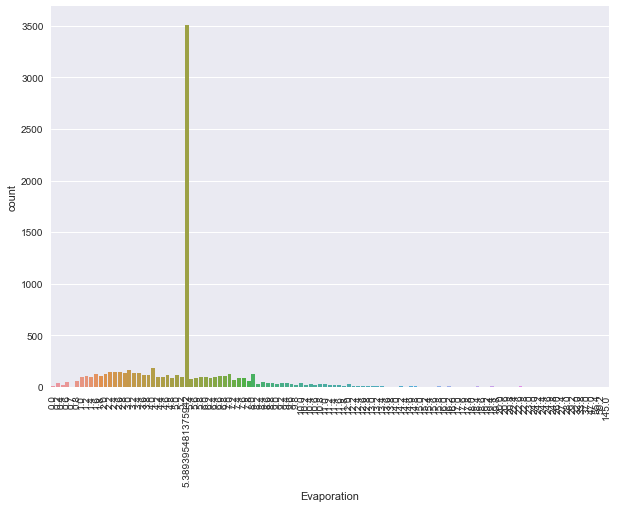

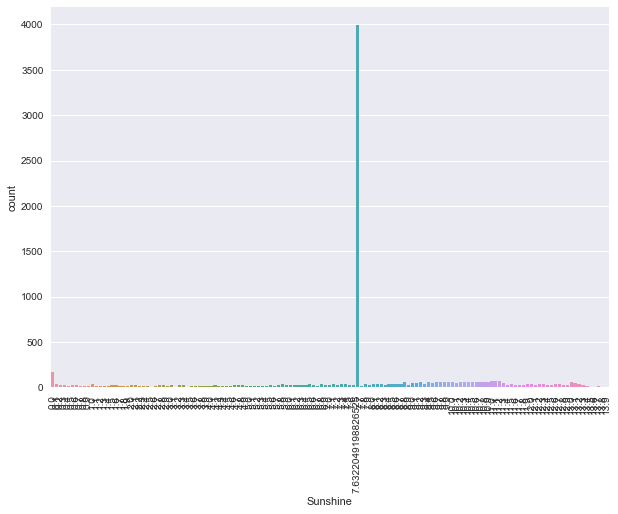

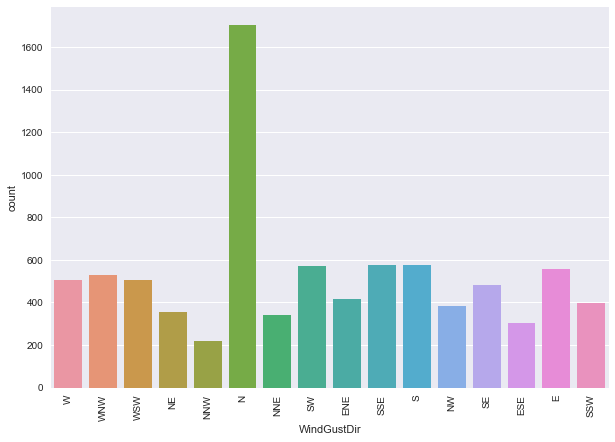

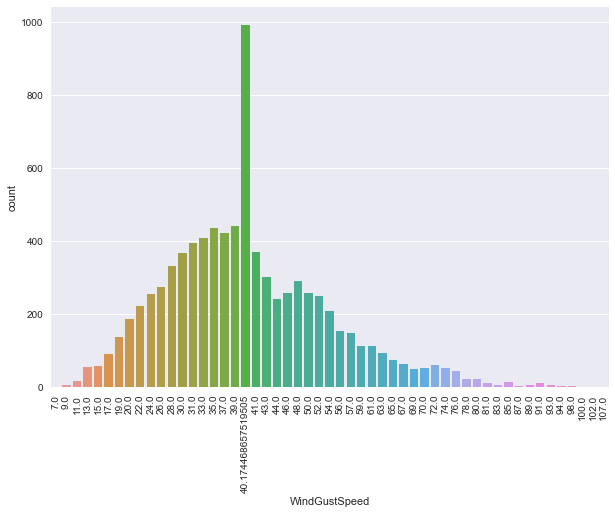

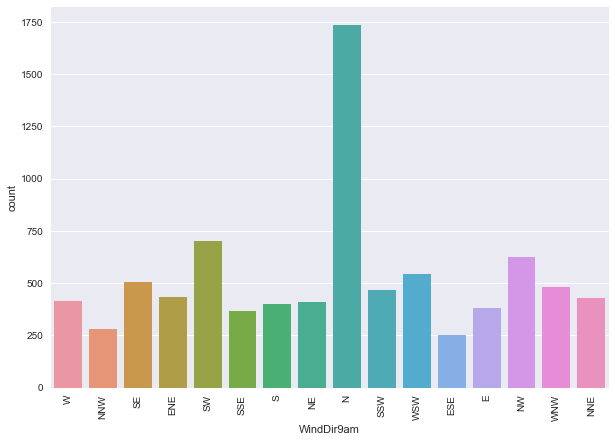

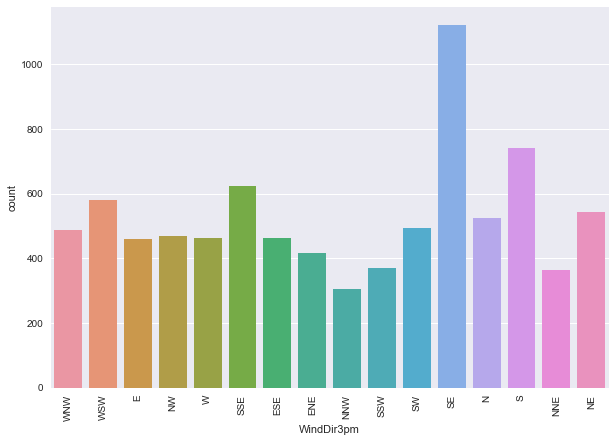

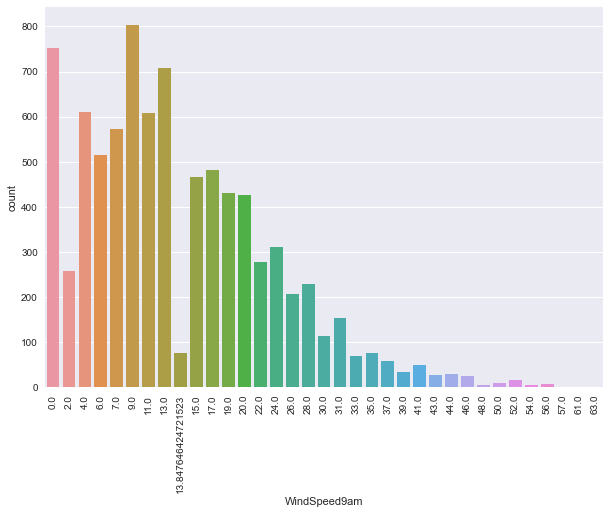

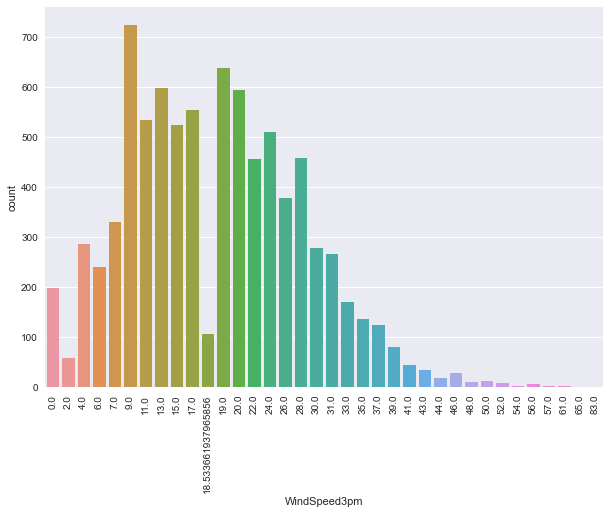

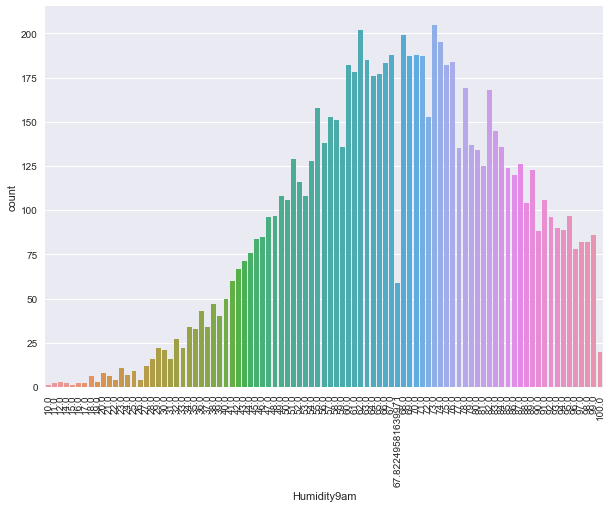

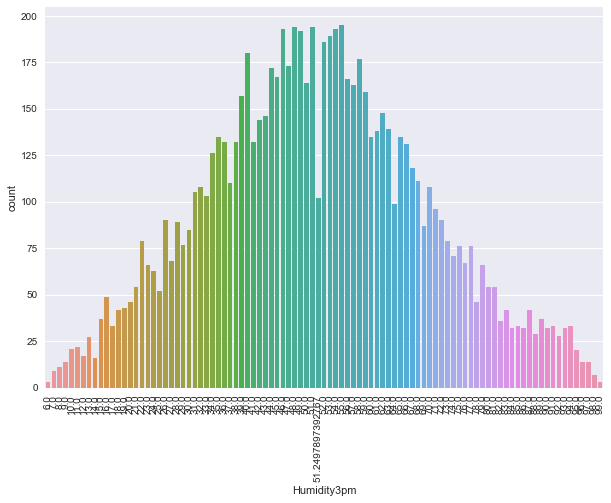

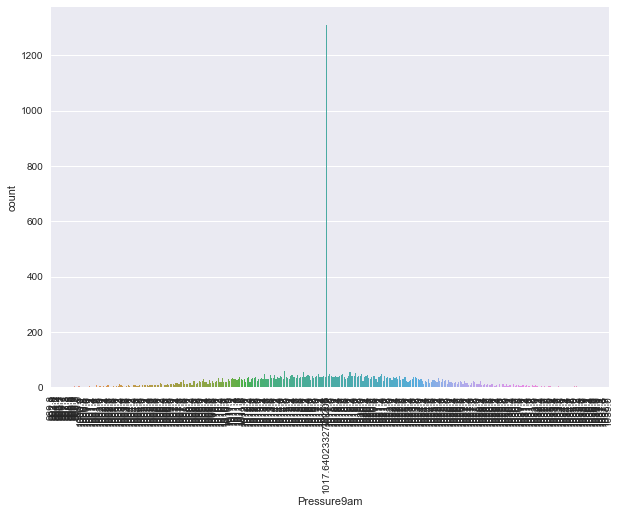

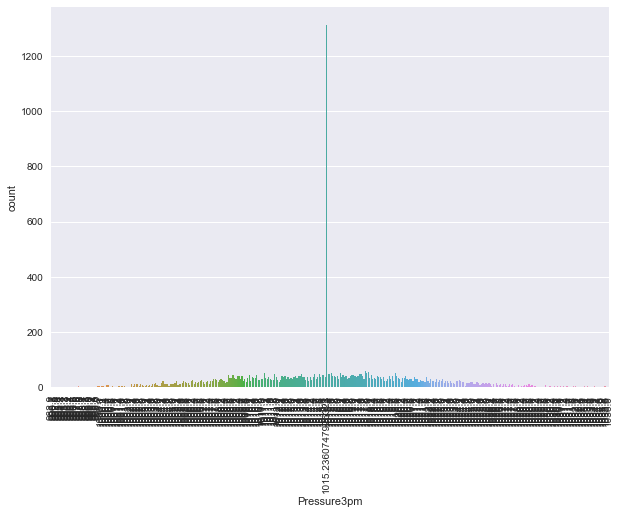

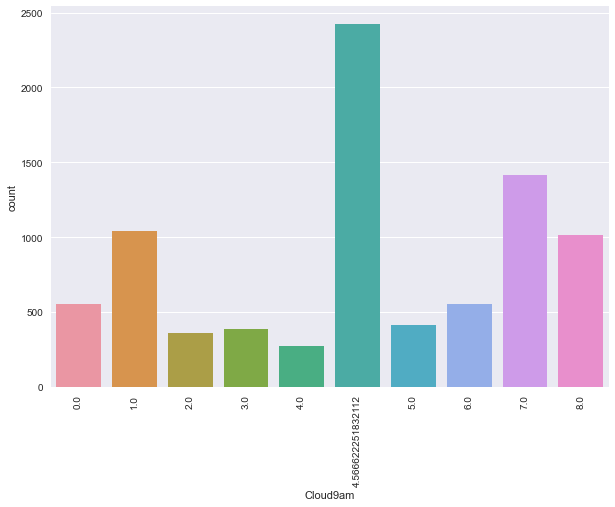

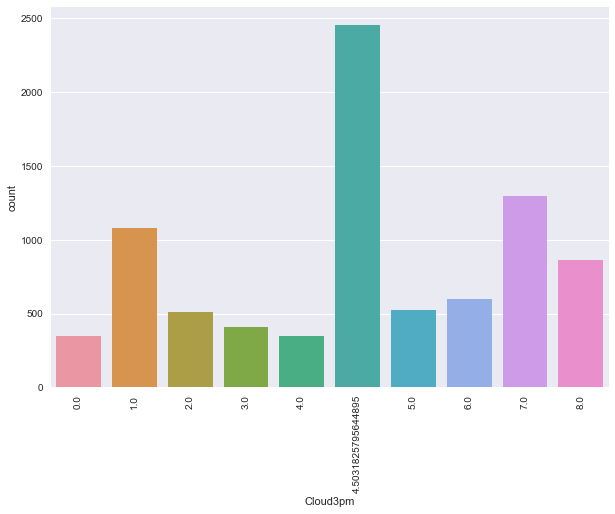

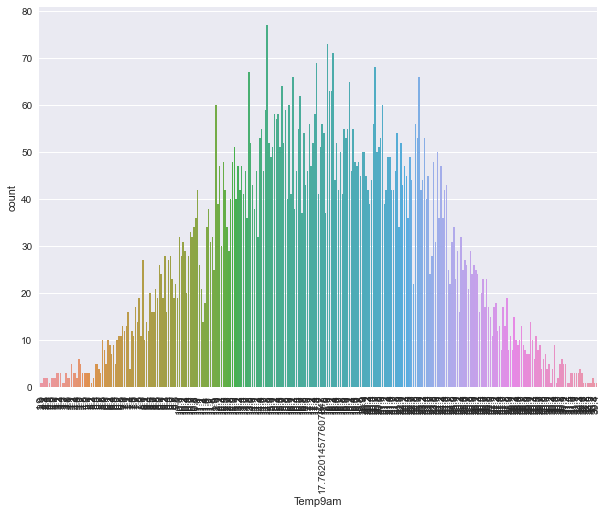

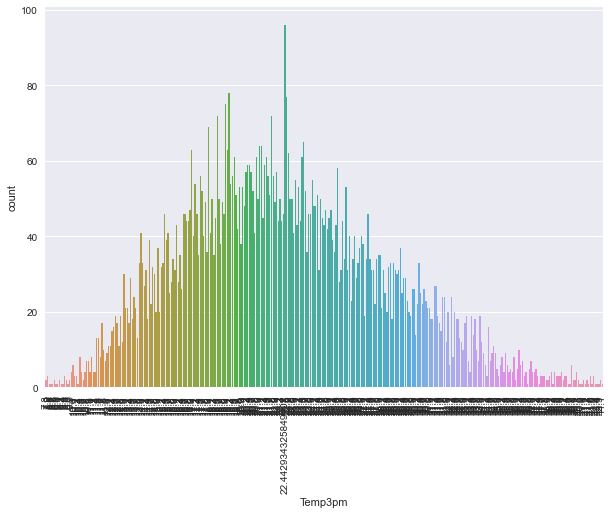

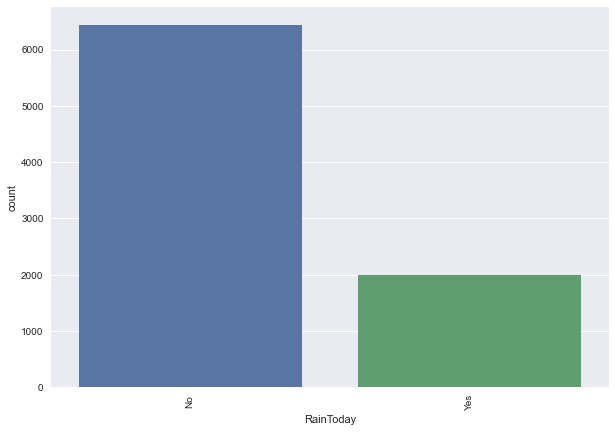

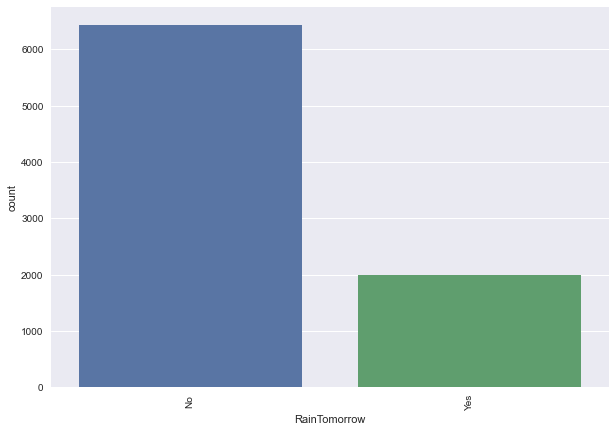

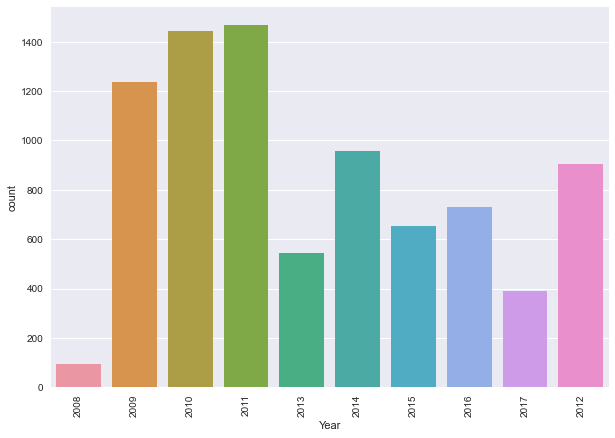

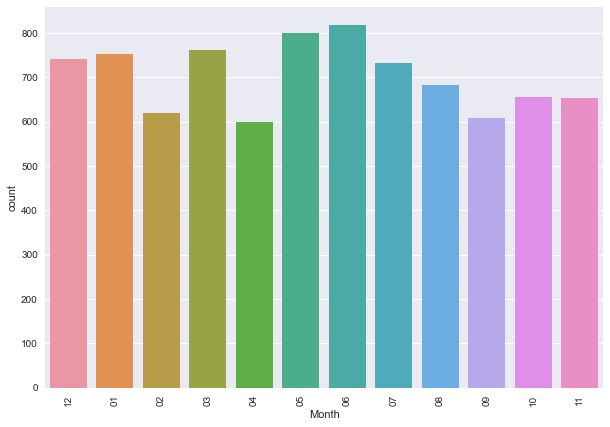

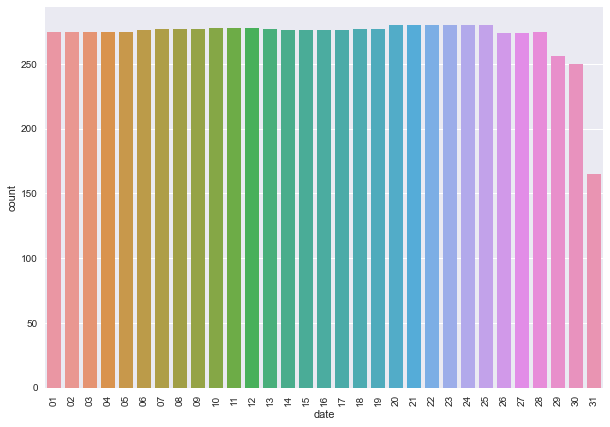

In [100]:
for i in df:
    plt.figure(figsize = (10, 7))
    sns.countplot(df[i])
    plt.xticks(rotation = 90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

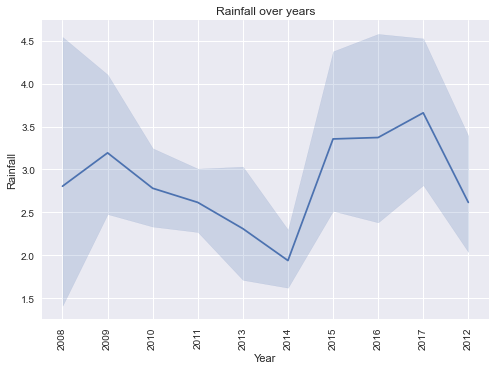

In [101]:

sns.lineplot(data=df, x=df["Year"], y=df["Rainfall"])
plt.title("Rainfall over years")
plt.xticks(rotation = 90)

### 3. DATA PREPROCESSING

##### Label encoding the catagorical varable

In [102]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

In [103]:
# Get list of categorical variables
s = (df.dtypes == "object")
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow', 'Year', 'Month', 'date']


In [104]:
# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for i in object_cols:
    df[i] = label_encoder.fit_transform(df[i])
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   int32  
 1   Location       8425 non-null   int32  
 2   MinTemp        8425 non-null   float64
 3   MaxTemp        8425 non-null   float64
 4   Rainfall       8425 non-null   float64
 5   Evaporation    8425 non-null   float64
 6   Sunshine       8425 non-null   float64
 7   WindGustDir    8425 non-null   int32  
 8   WindGustSpeed  8425 non-null   float64
 9   WindDir9am     8425 non-null   int32  
 10  WindDir3pm     8425 non-null   int32  
 11  WindSpeed9am   8425 non-null   float64
 12  WindSpeed3pm   8425 non-null   float64
 13  Humidity9am    8425 non-null   float64
 14  Humidity3pm    8425 non-null   float64
 15  Pressure9am    8425 non-null   float64
 16  Pressure3pm    8425 non-null   float64
 17  Cloud9am       8425 non-null   float64
 18  Cloud3pm

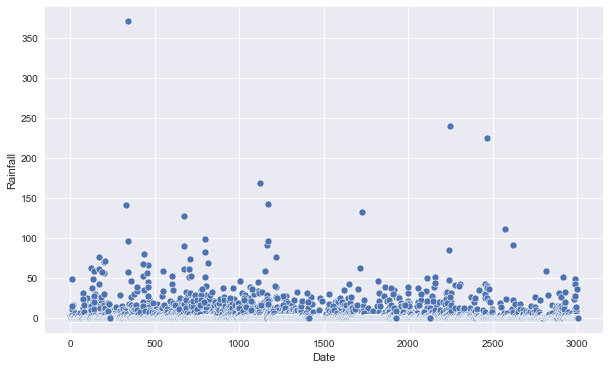

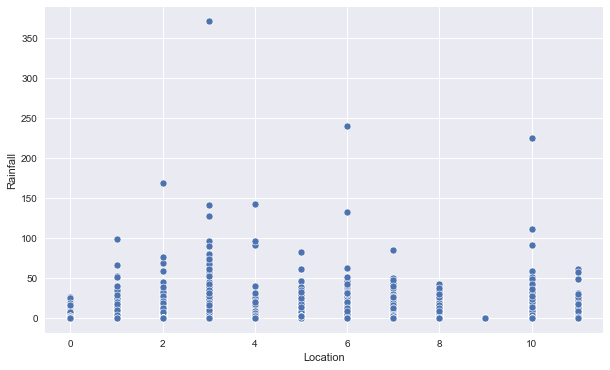

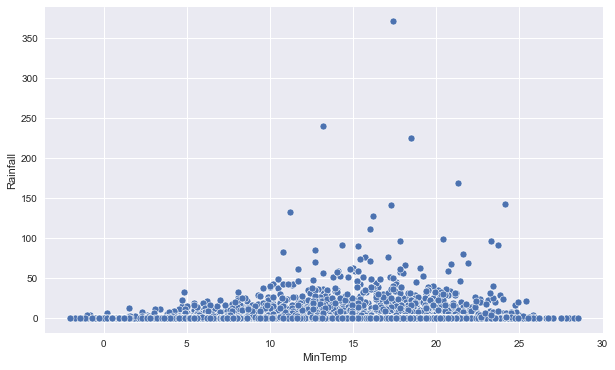

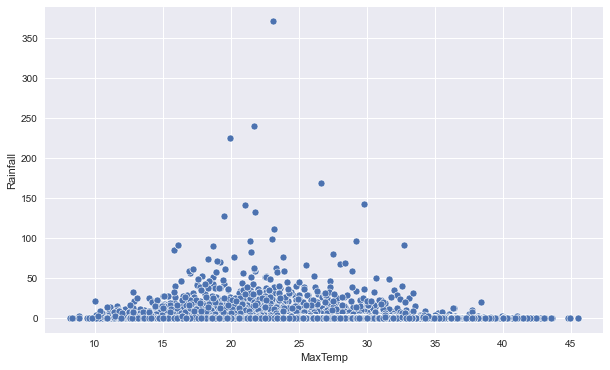

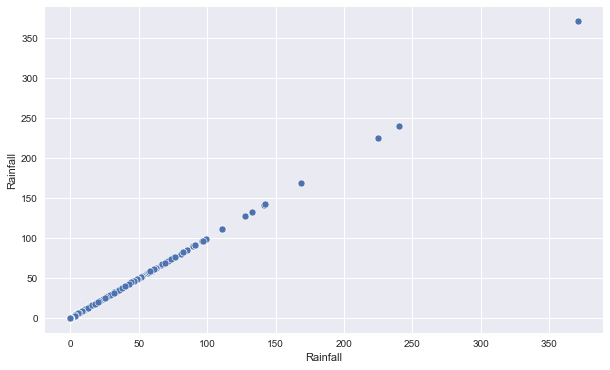

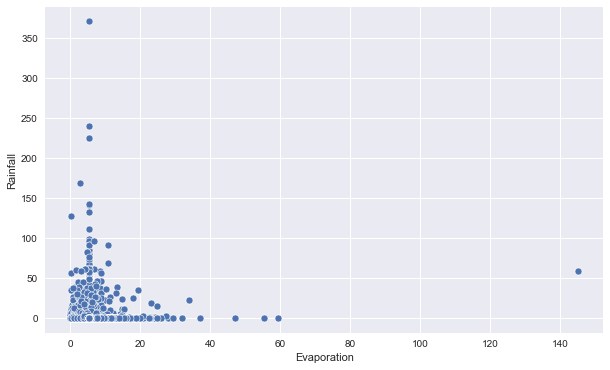

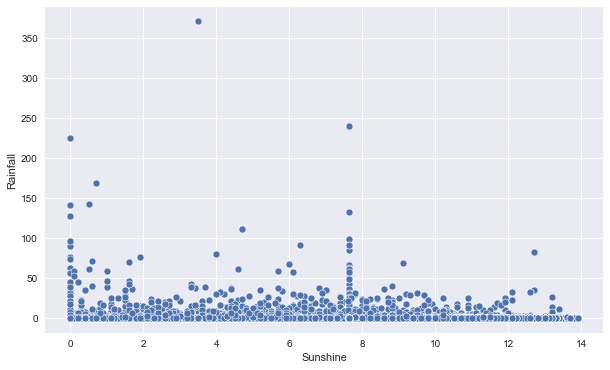

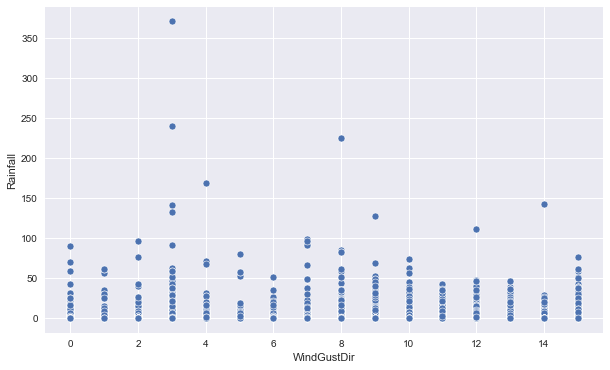

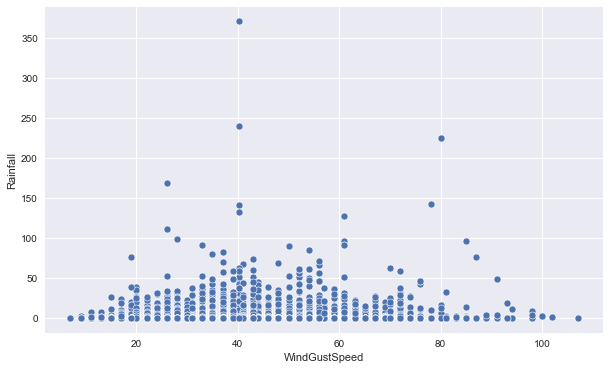

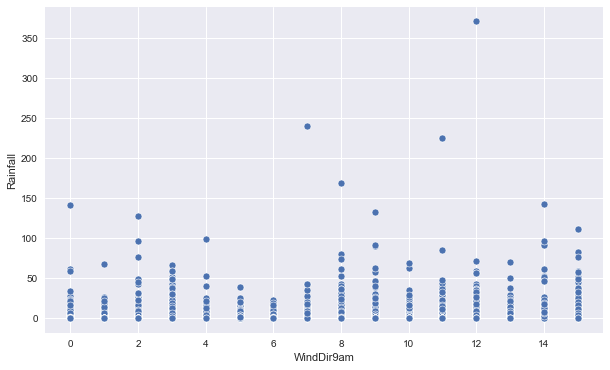

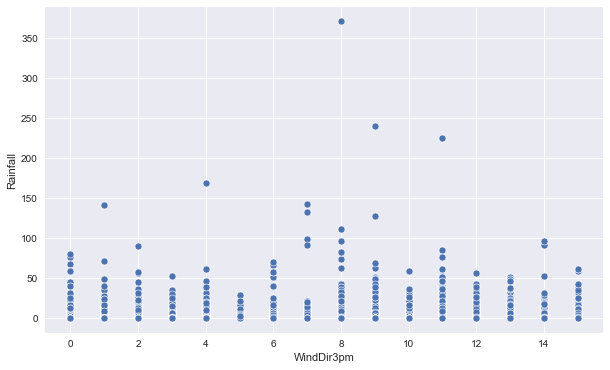

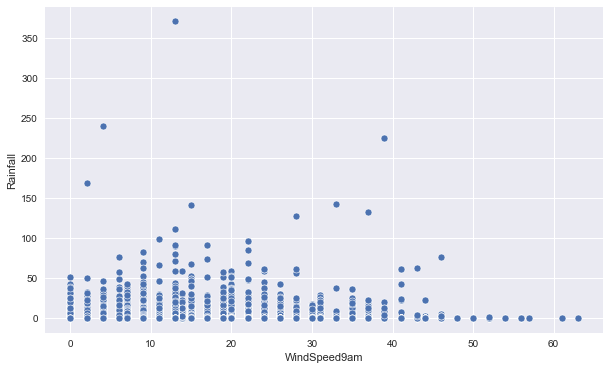

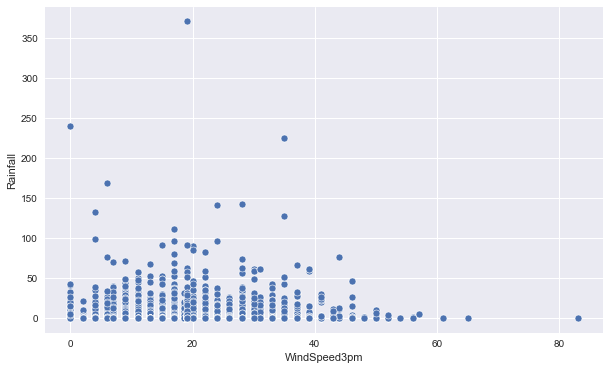

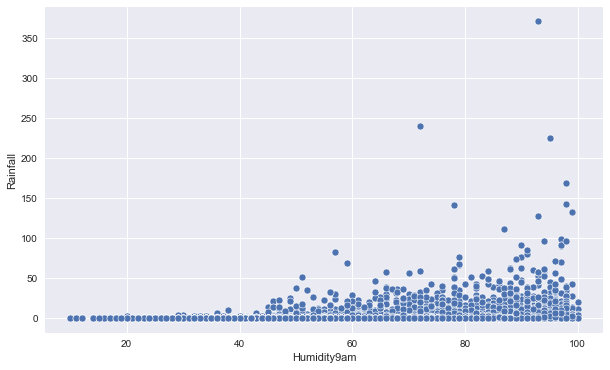

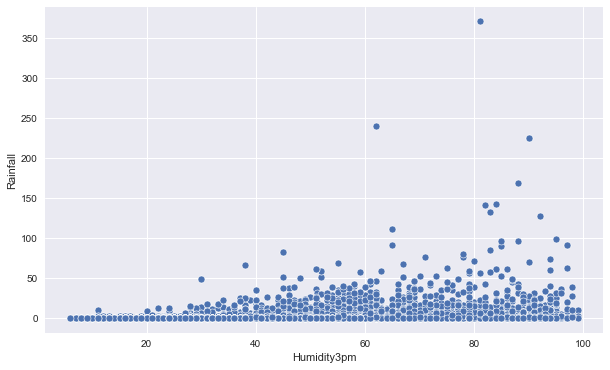

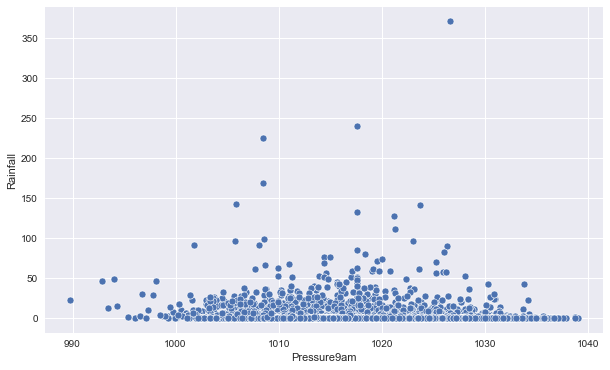

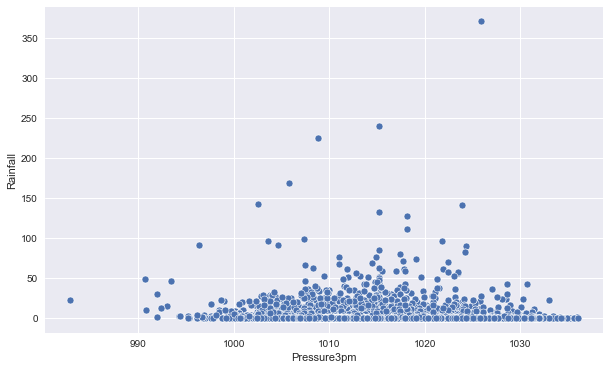

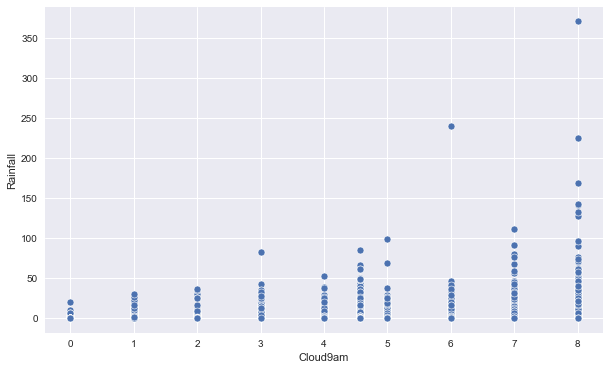

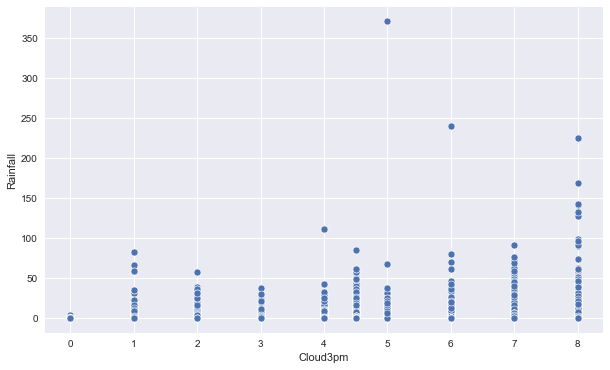

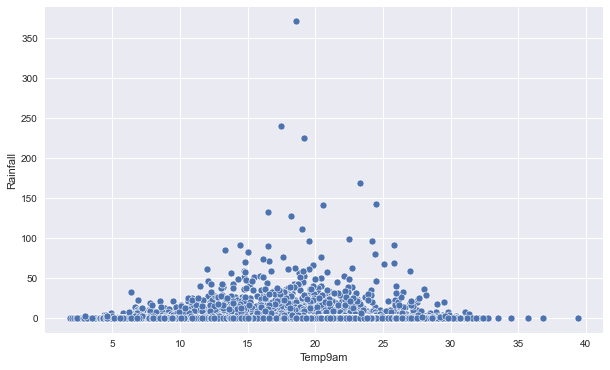

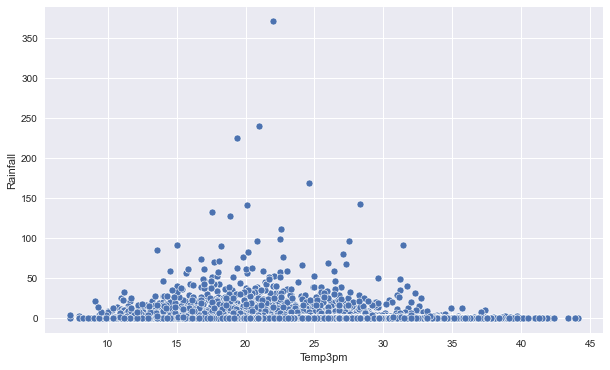

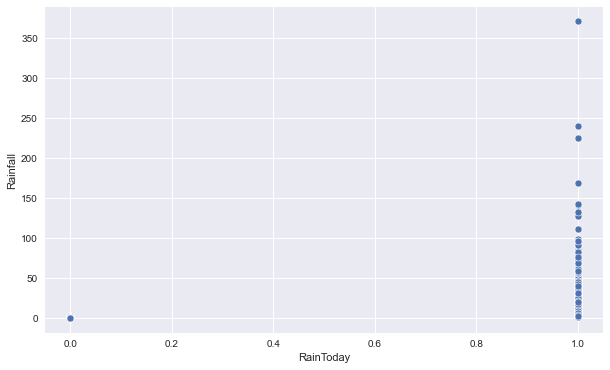

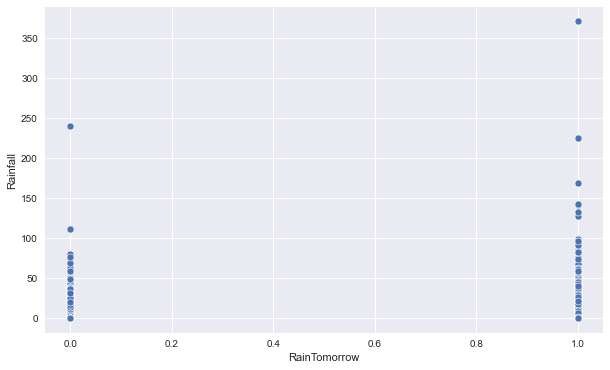

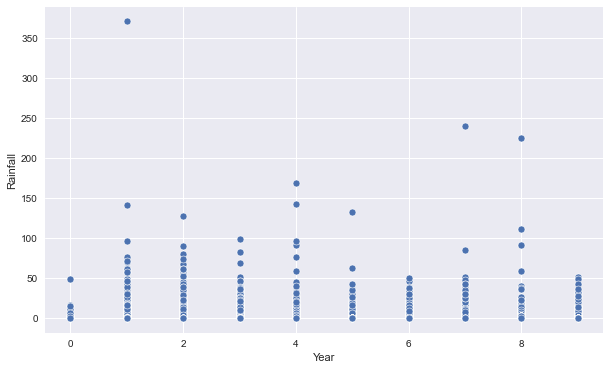

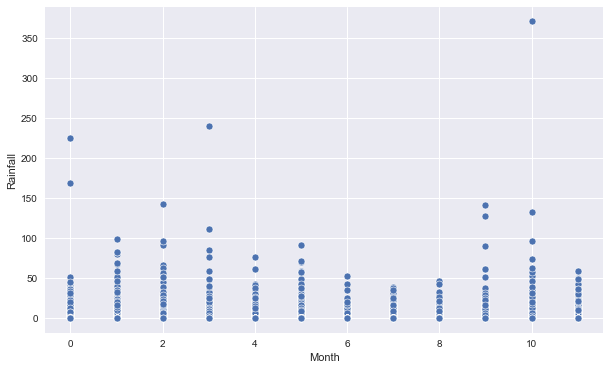

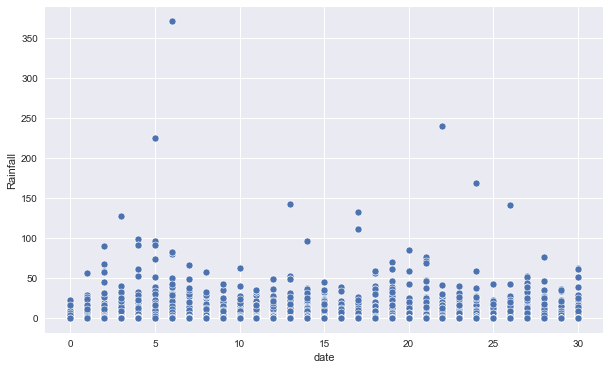

In [105]:
for i in df.columns:
    plt.figure(figsize=[10,6])
    sns.scatterplot(x=i,y=df['Rainfall'],data=df)


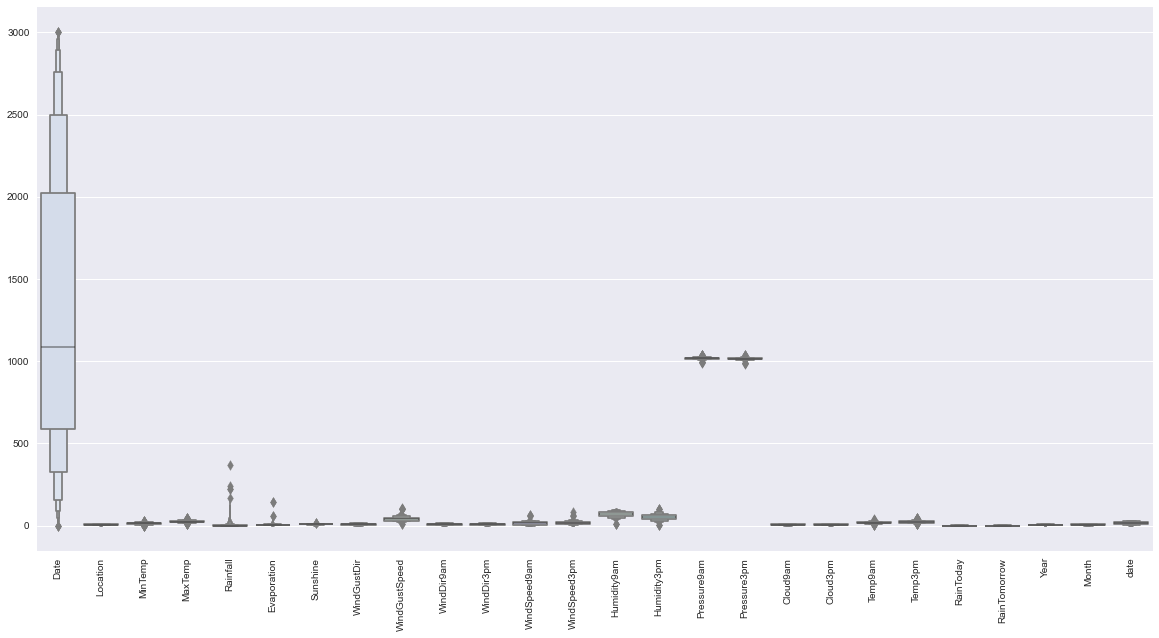

In [106]:
#Detecting outliers
#looking at the scaled features
colours = ["#D0DBEE", "#C2C4E2", "#EED4E5", "#D1E6DC", "#BDE2E2"]
plt.figure(figsize=(20,10))
sns.boxenplot(data = df,palette = colours)
plt.xticks(rotation=90)
plt.show()

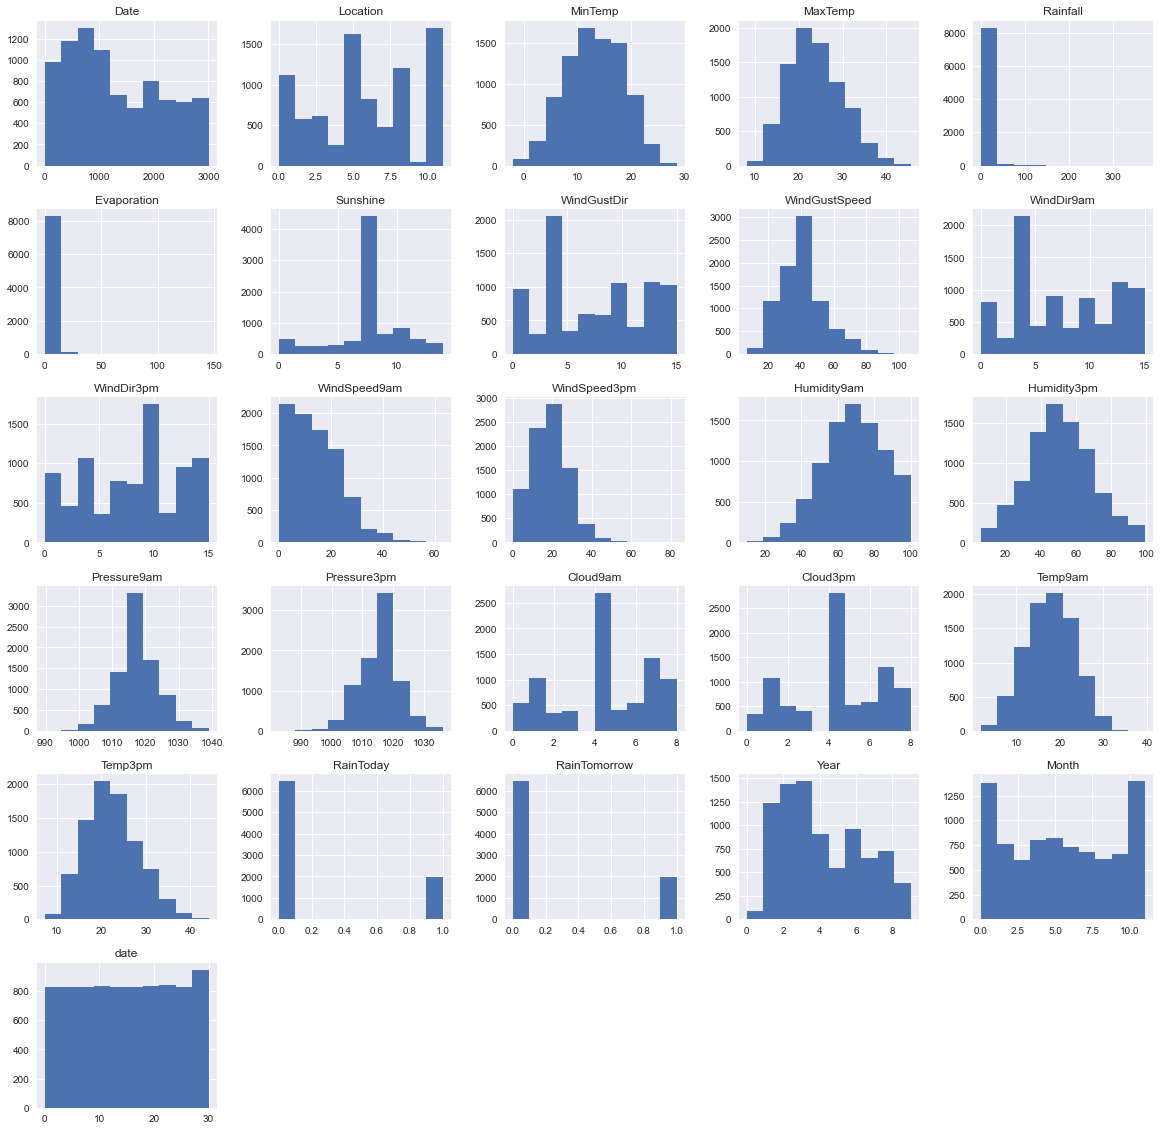

In [107]:
df.hist(figsize=(20, 20));

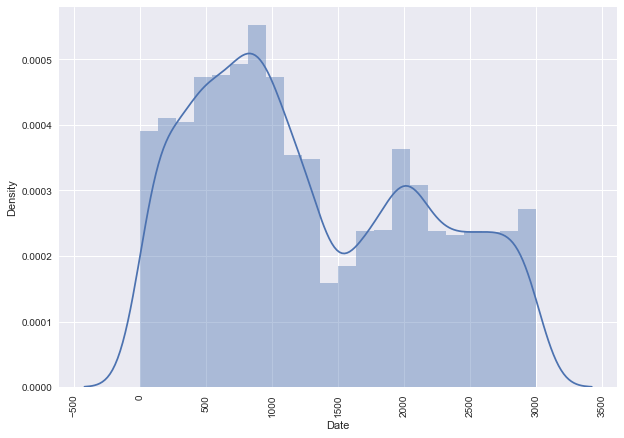

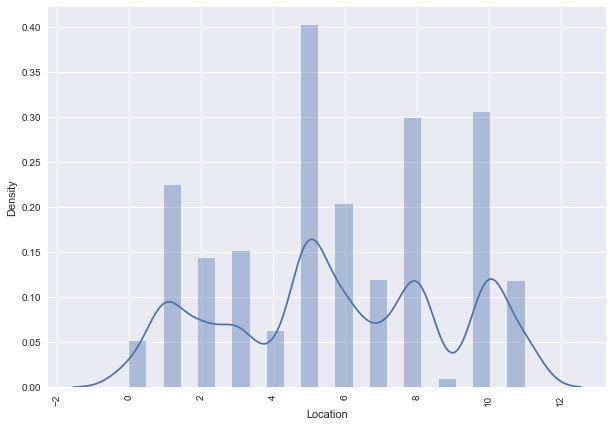

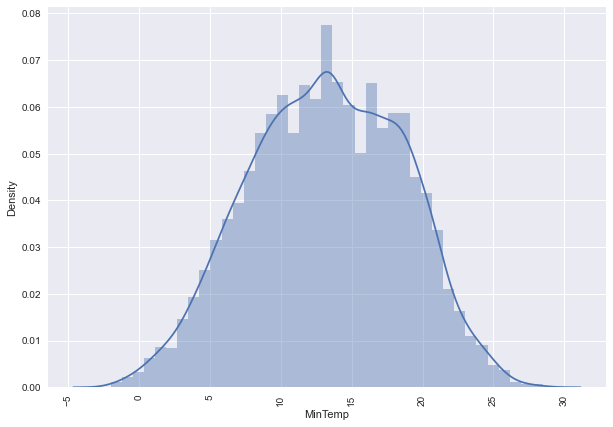

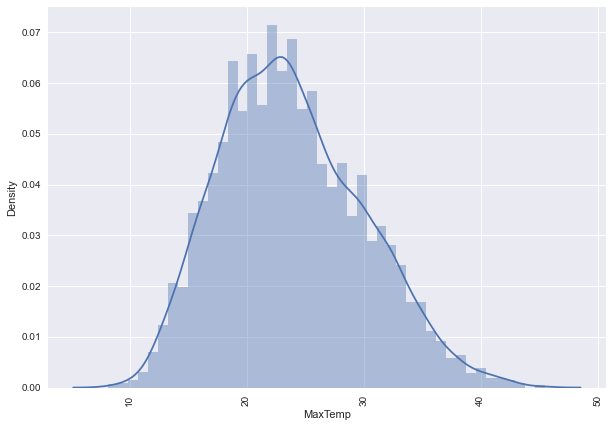

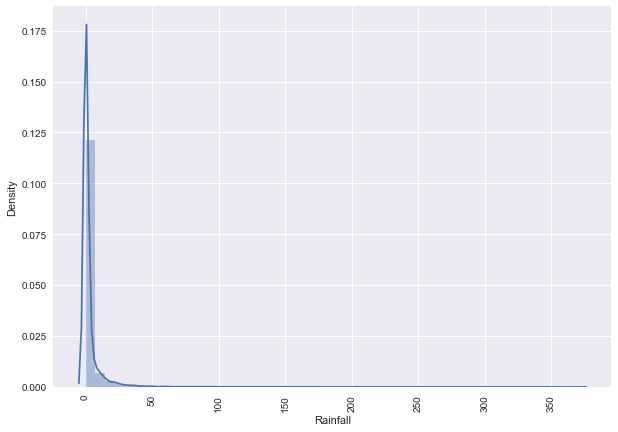

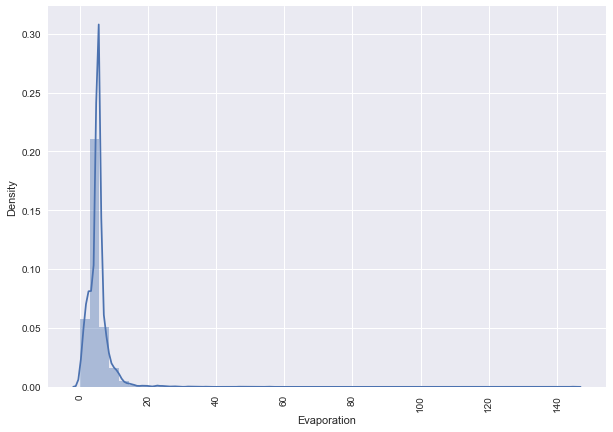

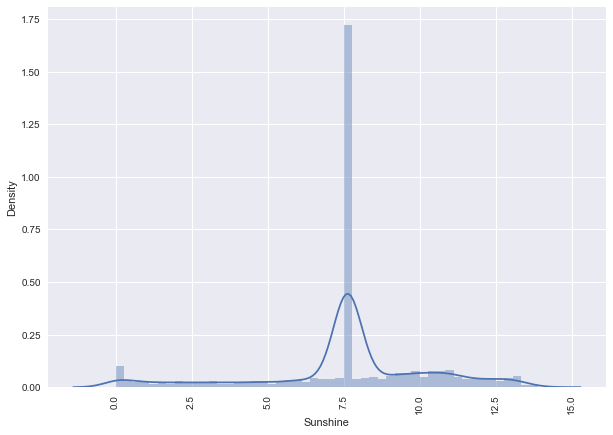

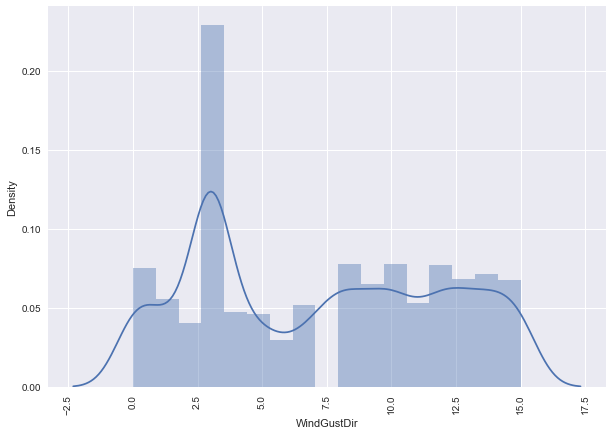

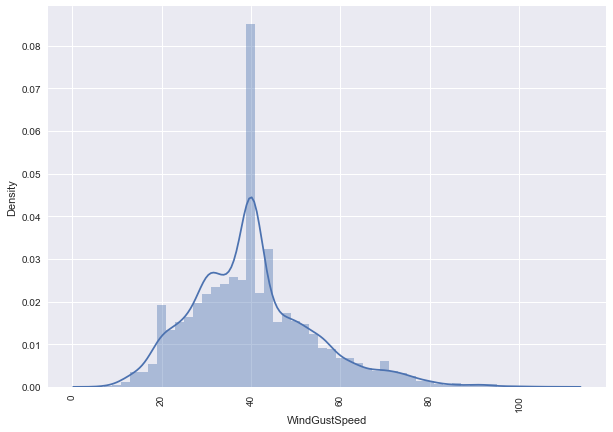

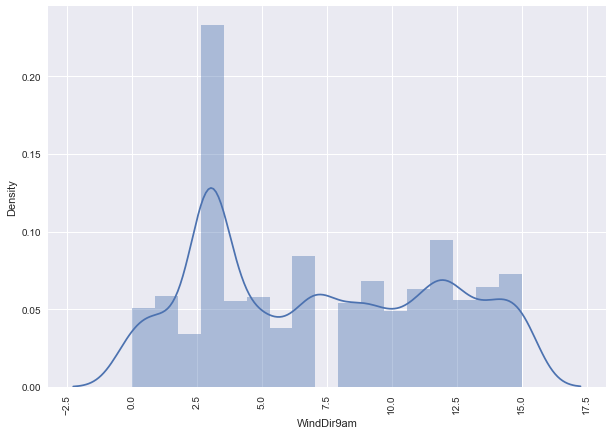

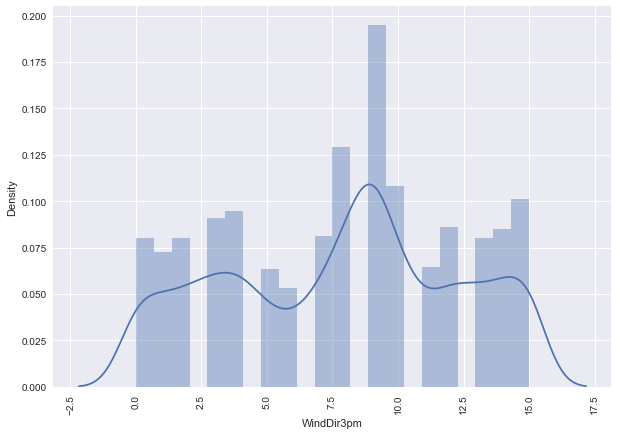

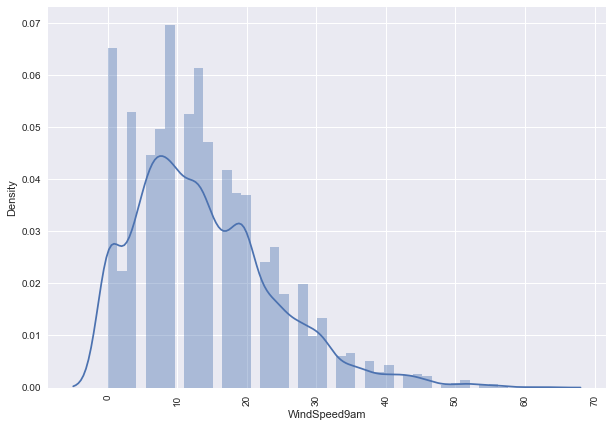

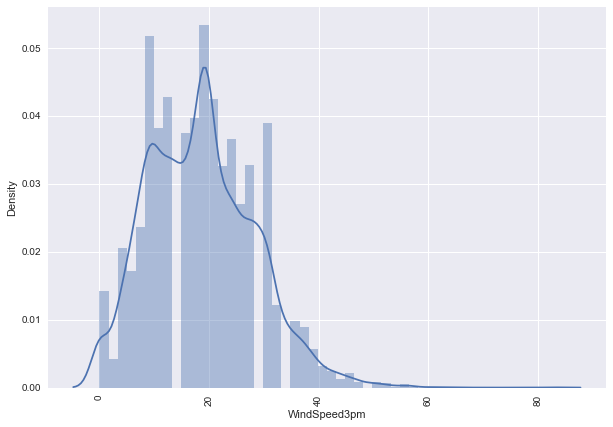

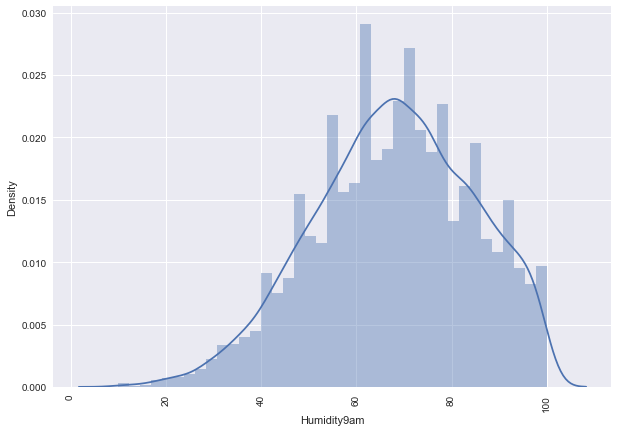

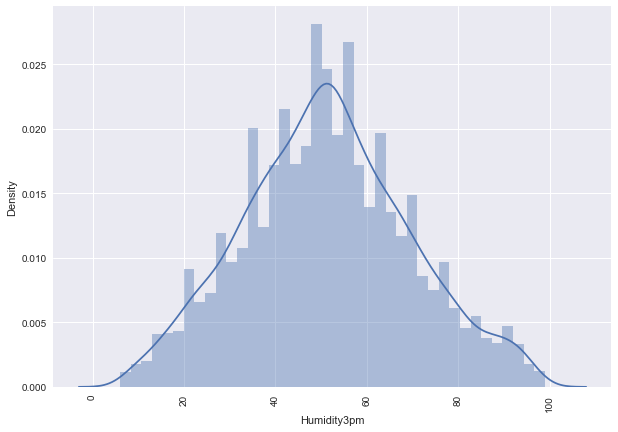

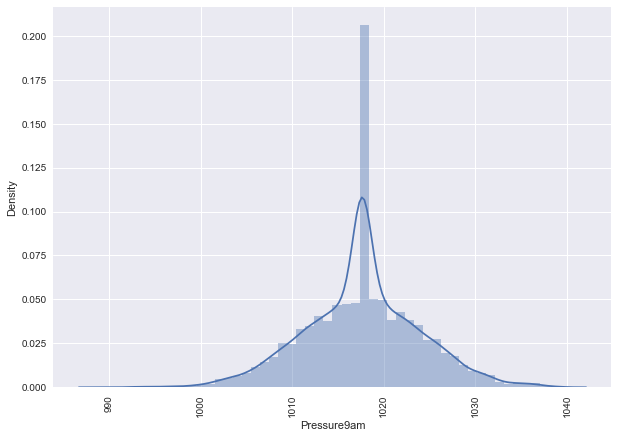

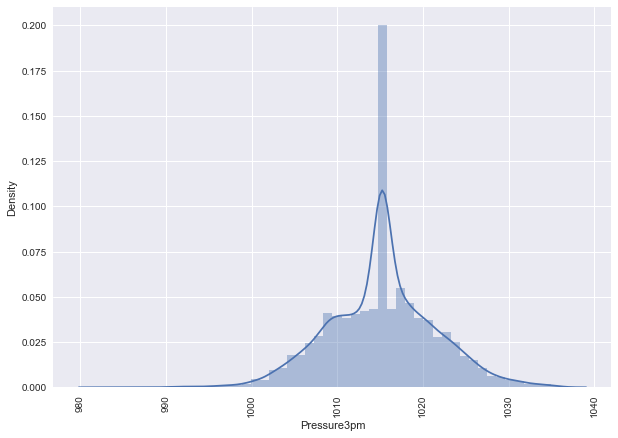

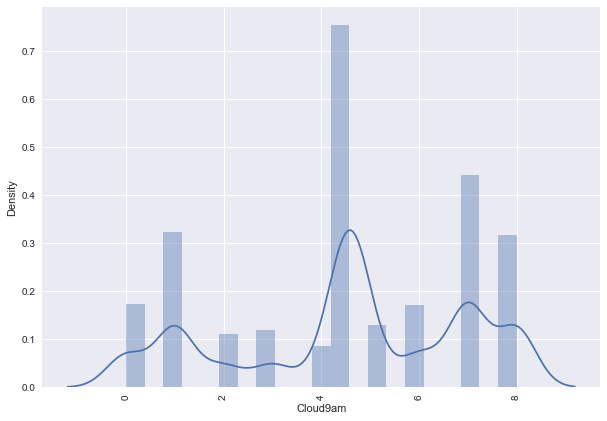

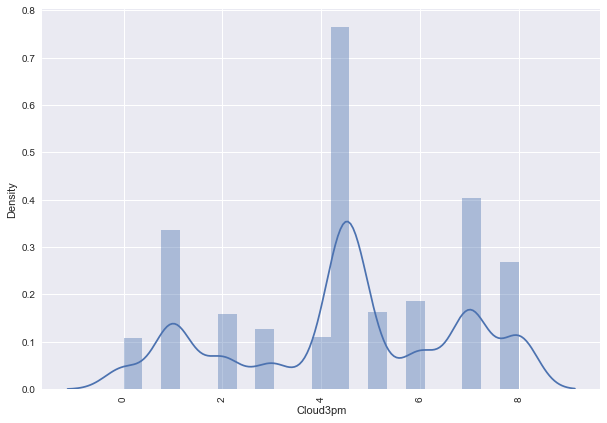

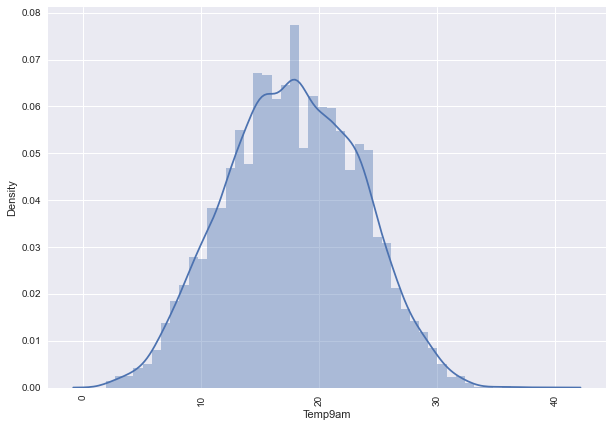

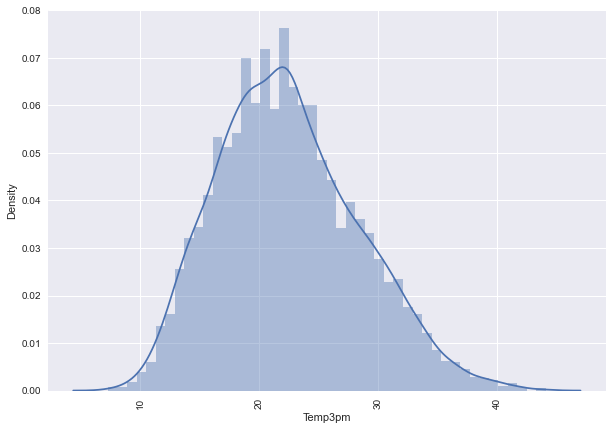

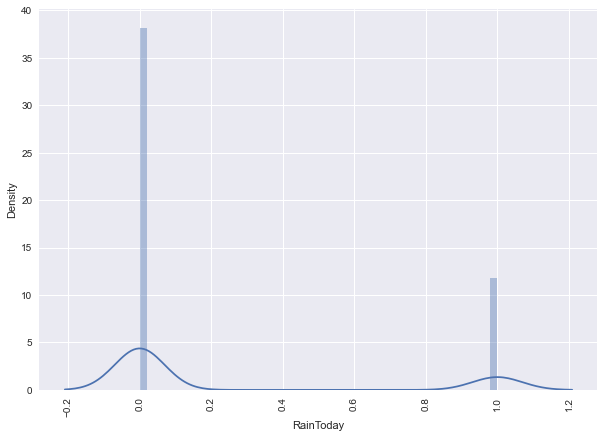

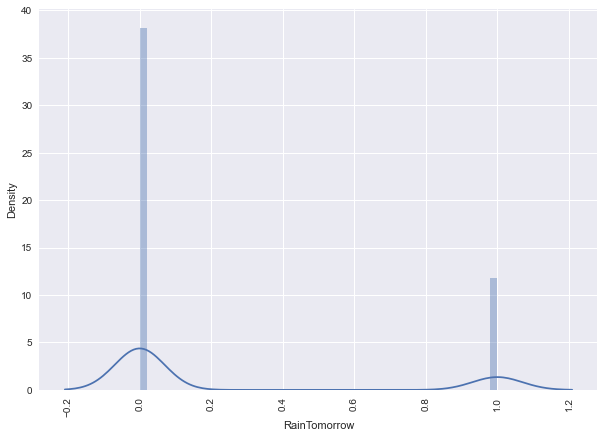

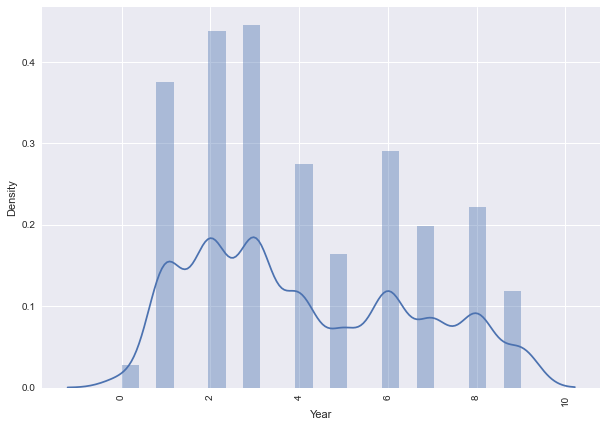

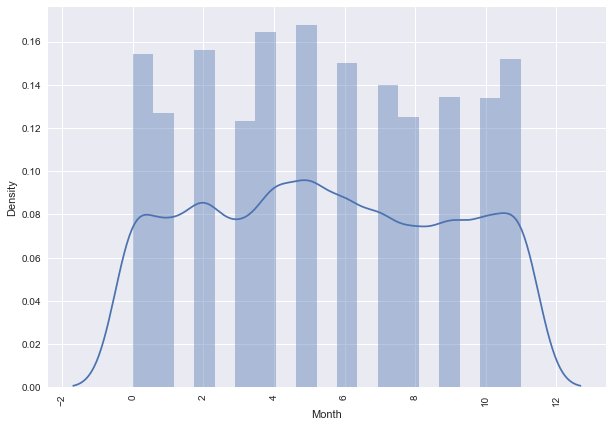

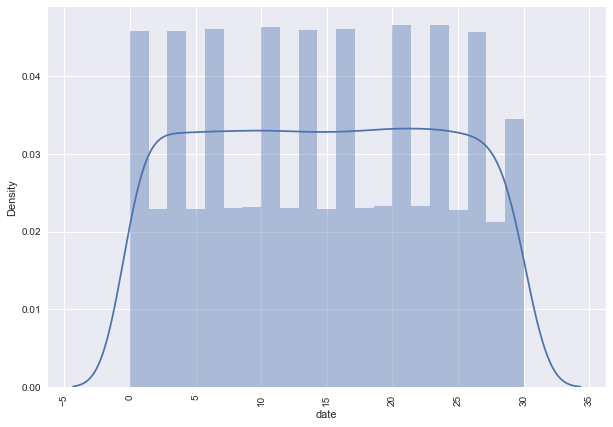

In [108]:
for i in df.columns:
    plt.figure(figsize = (10, 7))
    sns.distplot(df[i])
    plt.xticks(rotation = 90)

### Correlation

In [109]:
df_corr=df.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)

<AxesSubplot:>

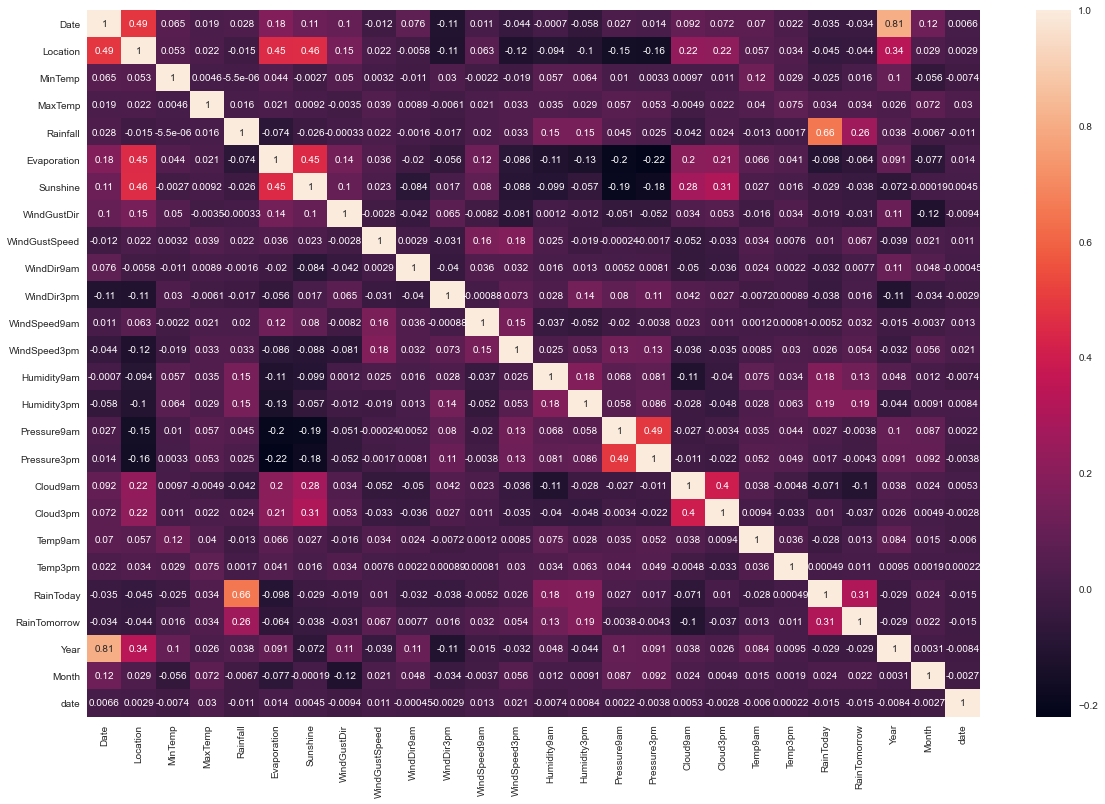

In [110]:
plt.figure(figsize=[20,13])
sns.heatmap((df_corr),annot=True)

### Outcome of correlation


From heatmap Rainfall dataset has positive correlation.

The following pairs of features are having high correlation between them:
    
MaxTemp and MinTemp

Pressure9am and Pressure3pm

Temp9am and Temp3pm

Evaporation and MaxTemp

MaxTemp and Temp3pm

#### Removing outliers

##### Z Score _ Technique

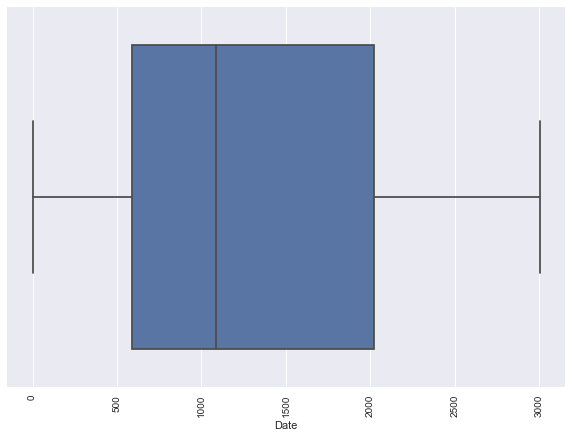

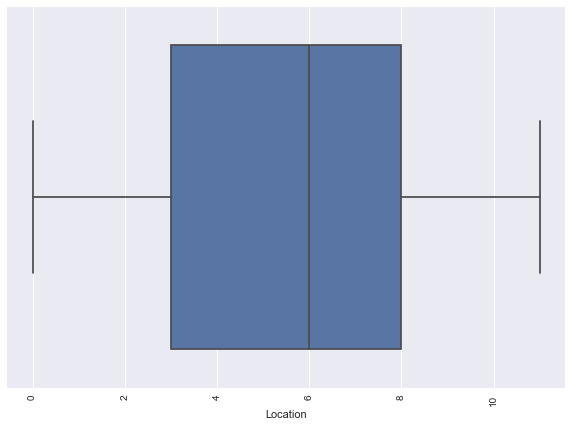

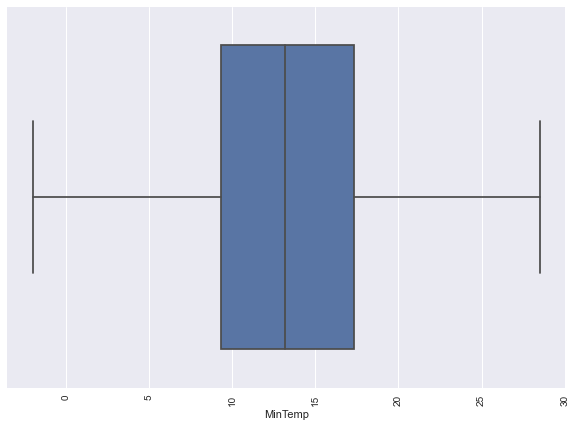

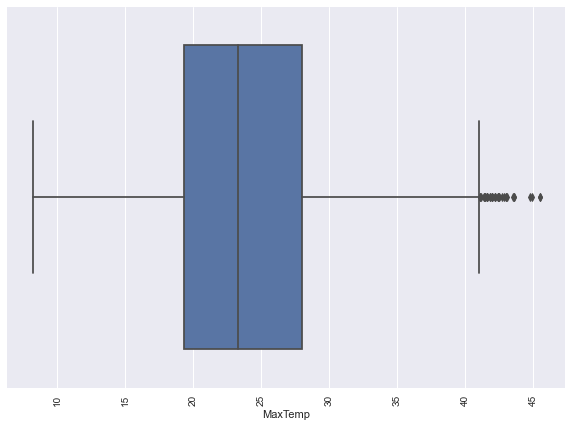

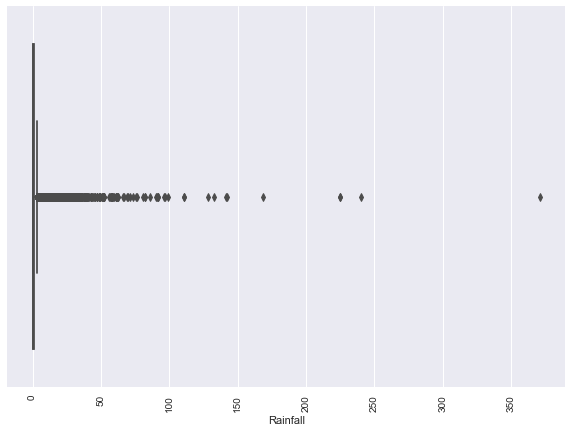

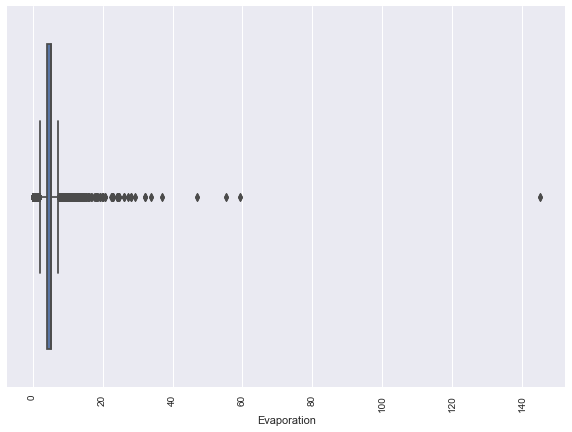

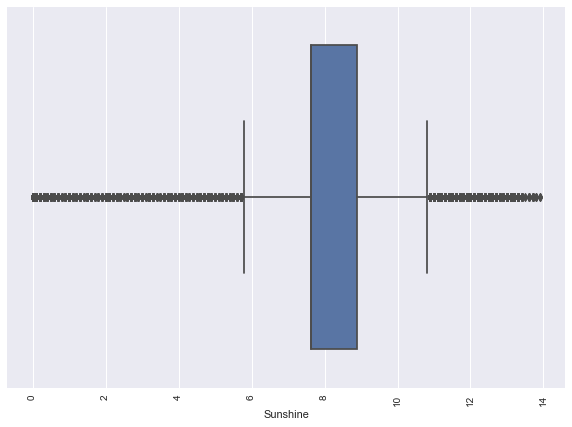

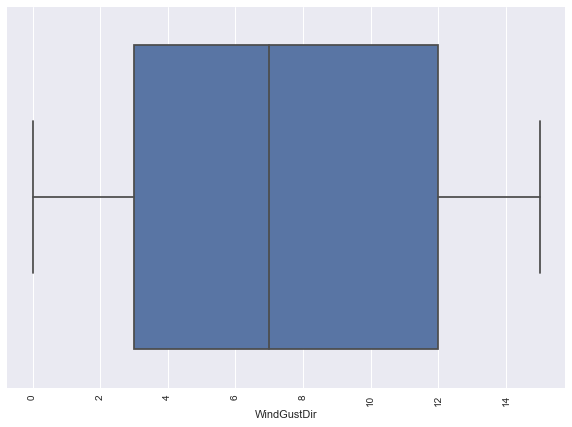

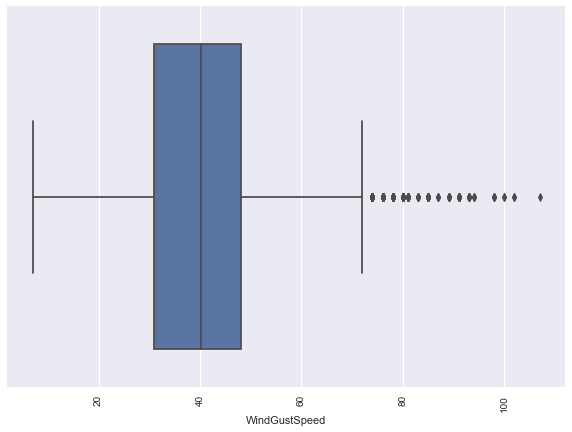

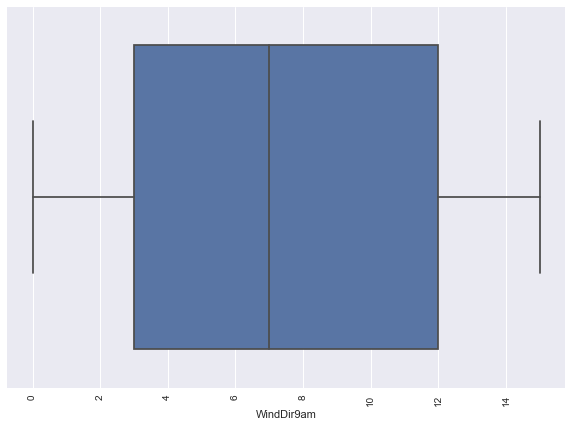

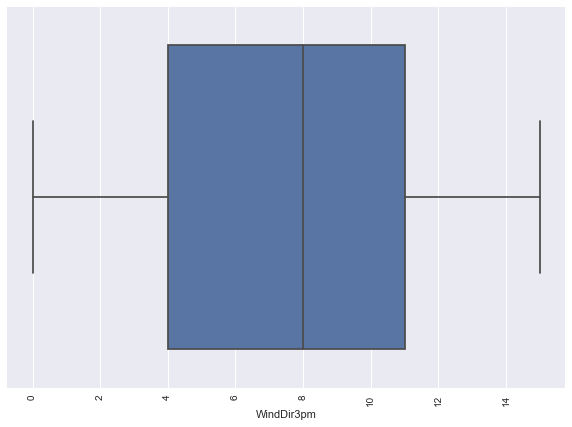

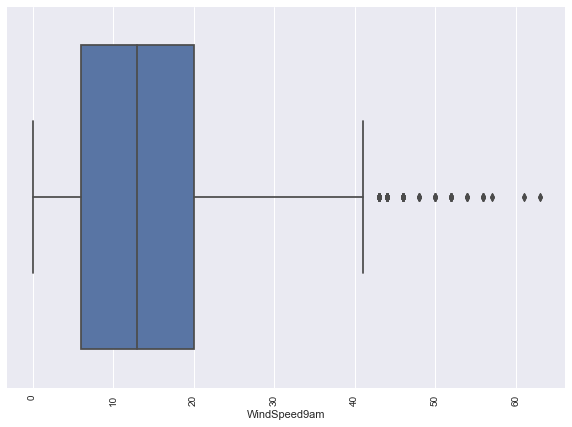

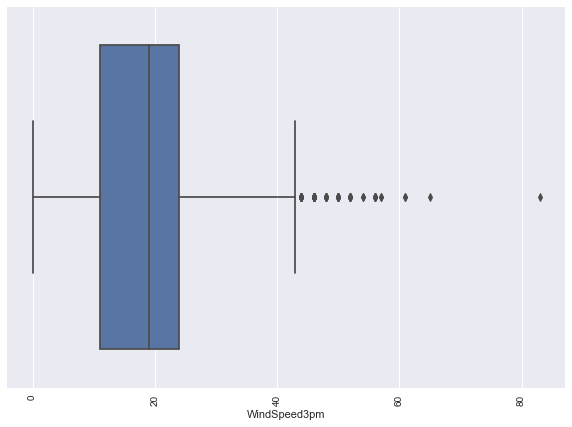

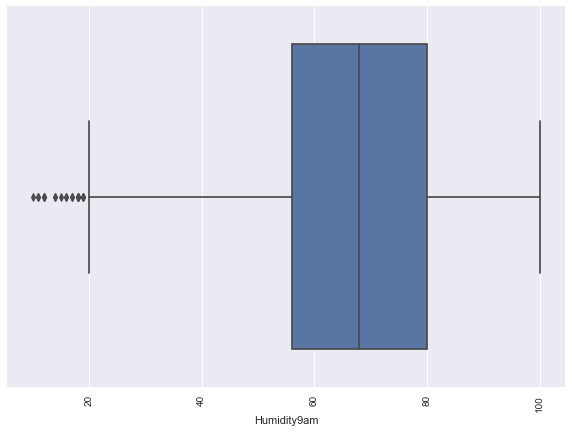

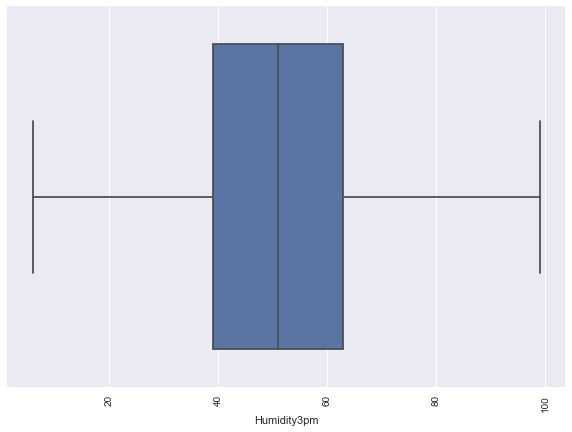

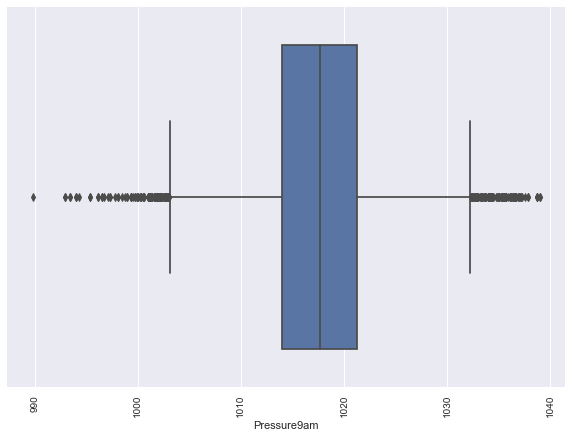

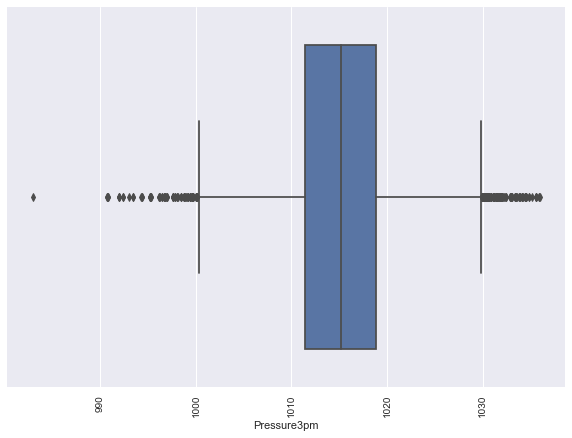

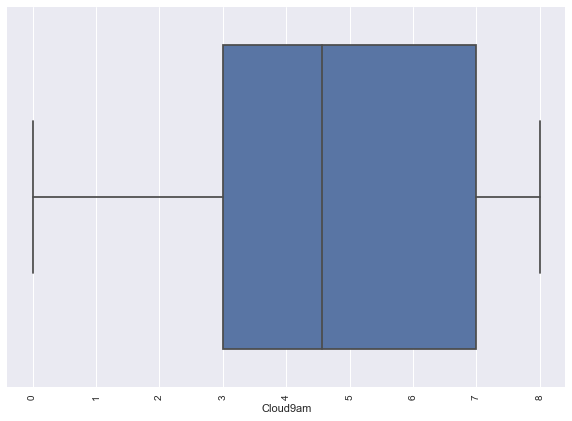

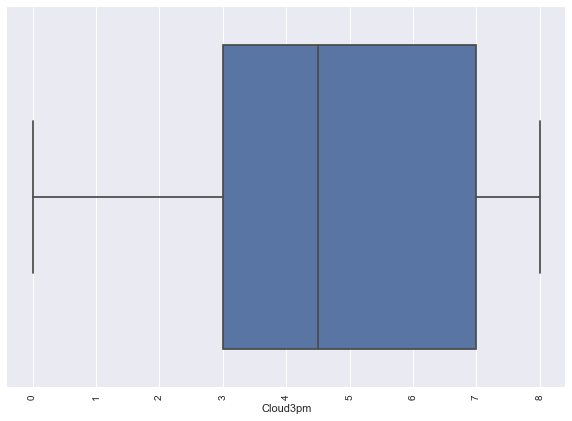

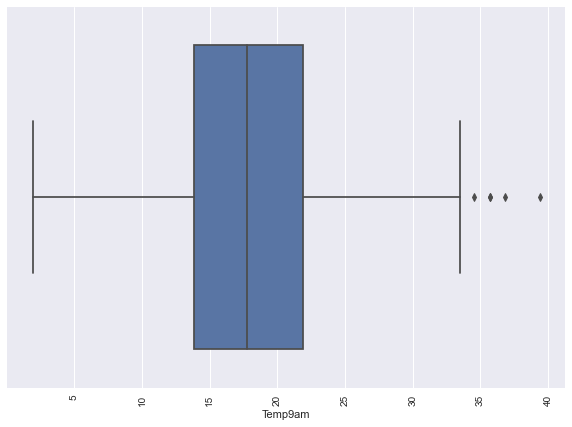

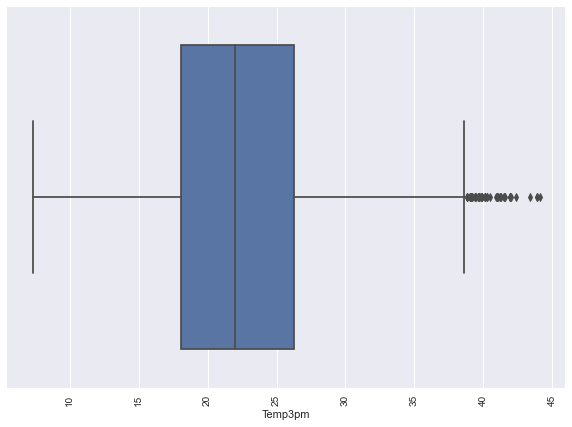

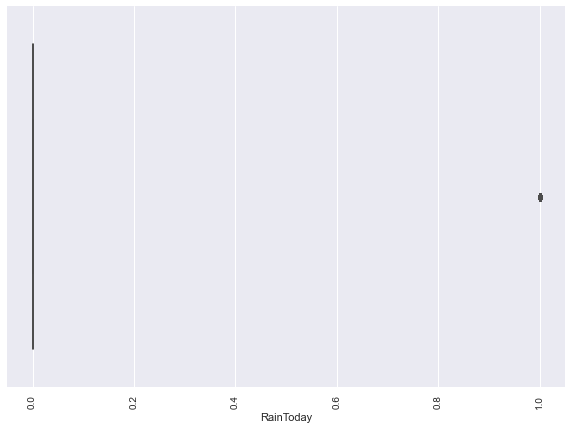

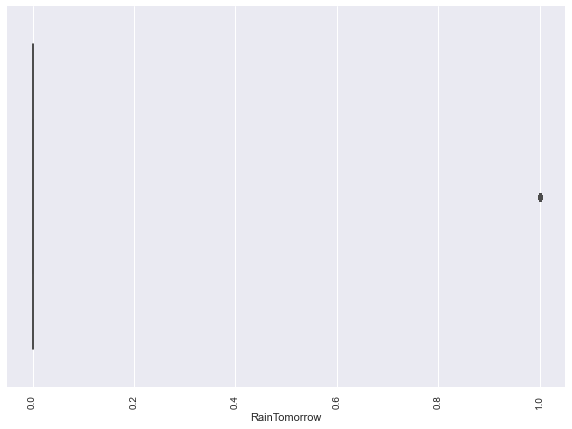

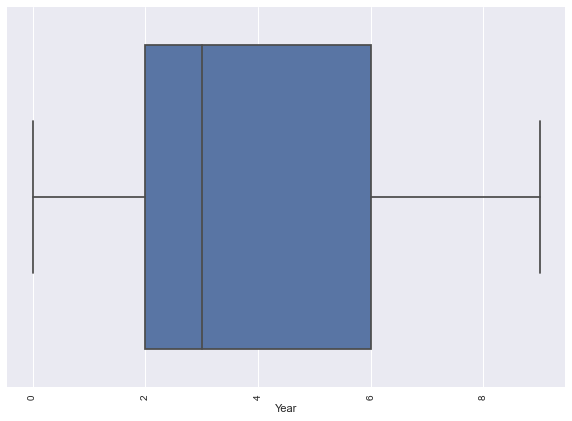

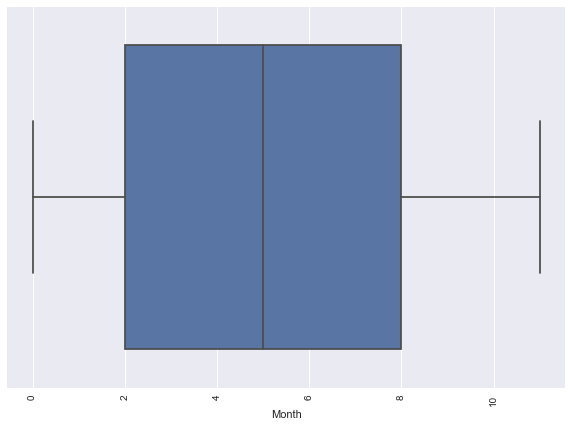

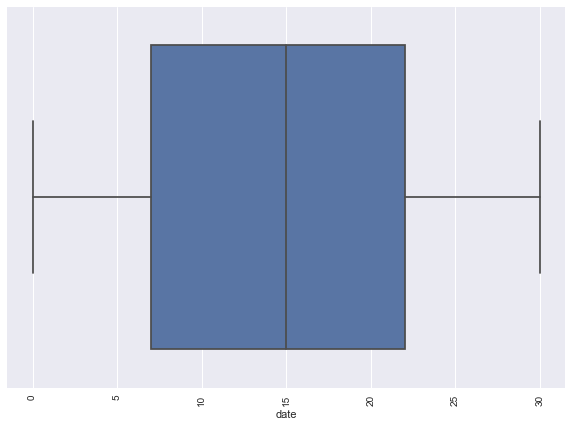

In [111]:
for i in df.columns:
    plt.figure(figsize = (10, 7))
    sns.boxplot(df[i])
    plt.xticks(rotation = 90)

In [112]:
from scipy.stats import zscore
import numpy as np

z=np.abs(zscore(df))
z.shape

(8425, 26)

In [113]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(8425, 26)
(7987, 26)


In [114]:
loss_percent=(8425-7987)/8425*100
print(loss_percent)

5.198813056379822


Z score is removing 5.19% data.

#### Removing skewness

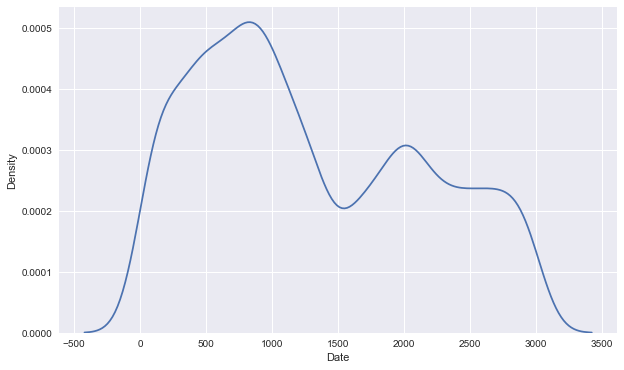

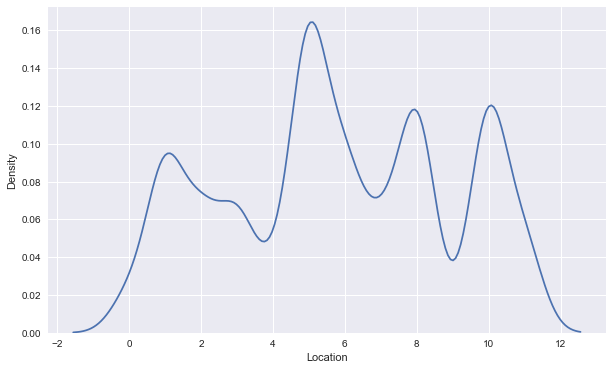

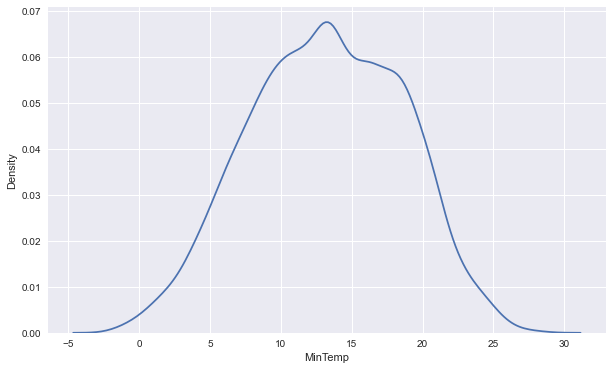

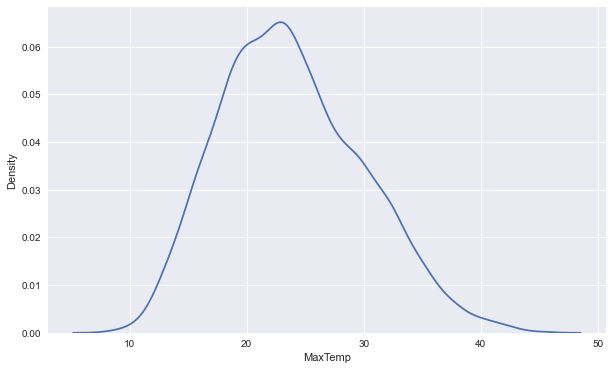

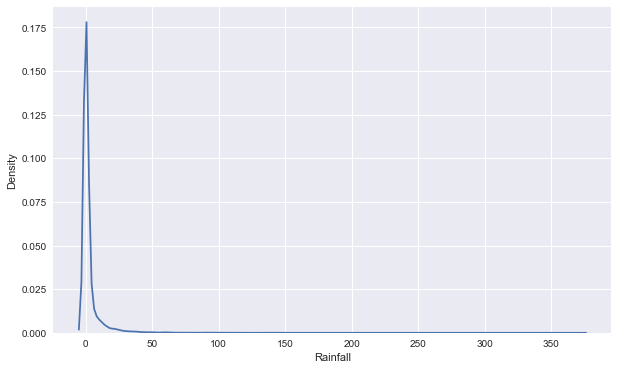

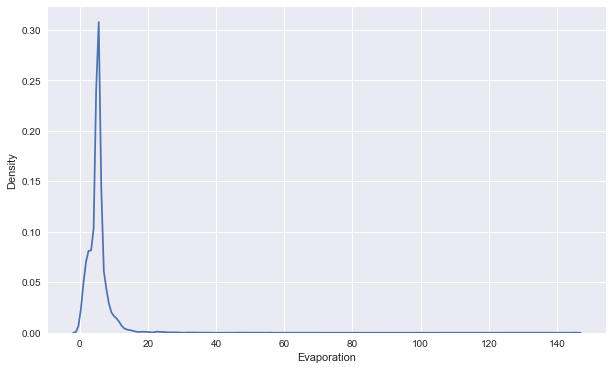

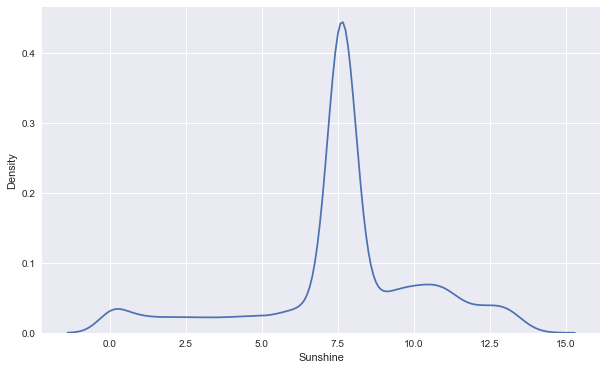

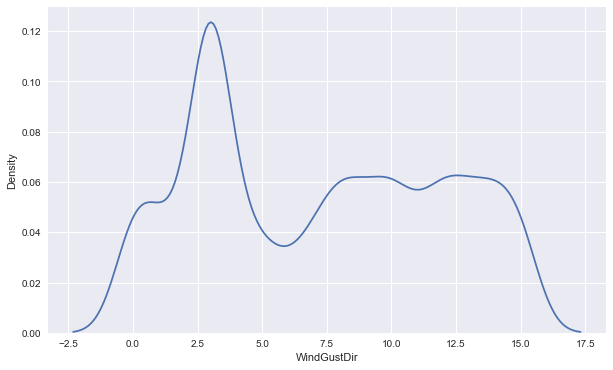

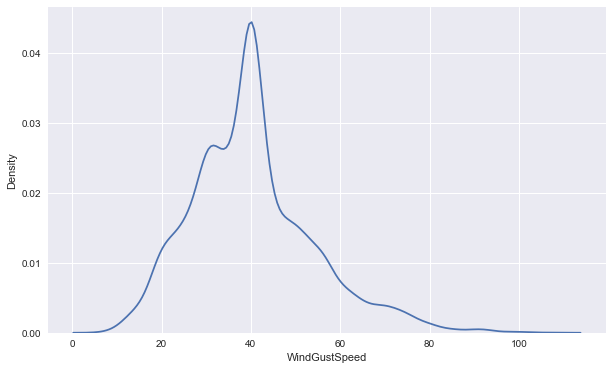

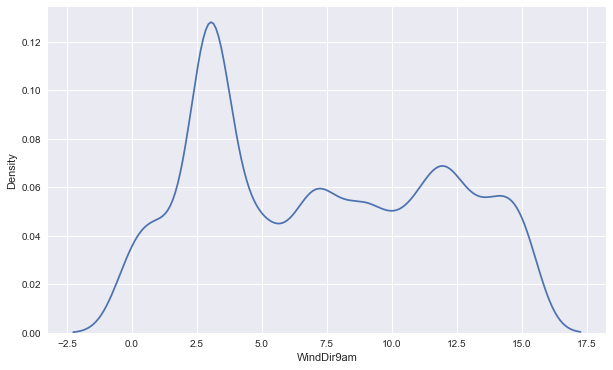

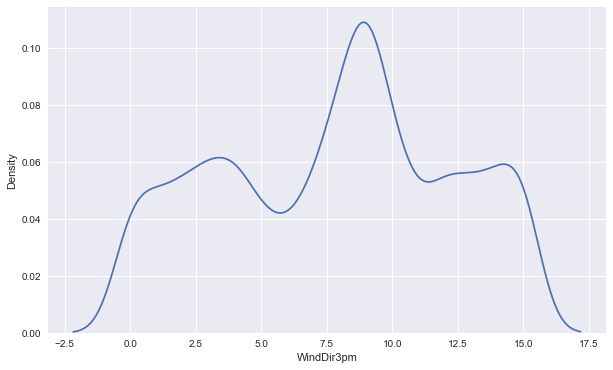

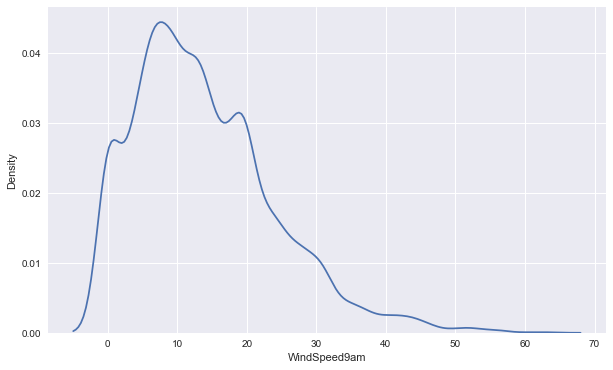

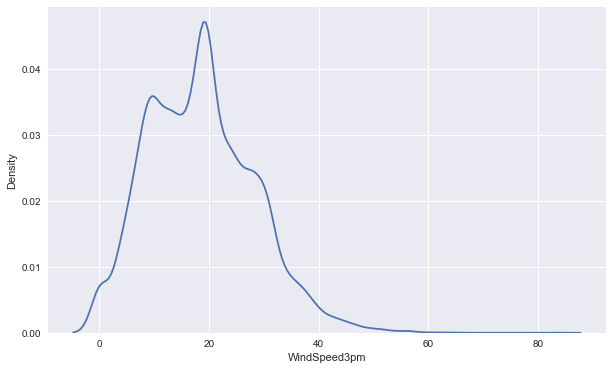

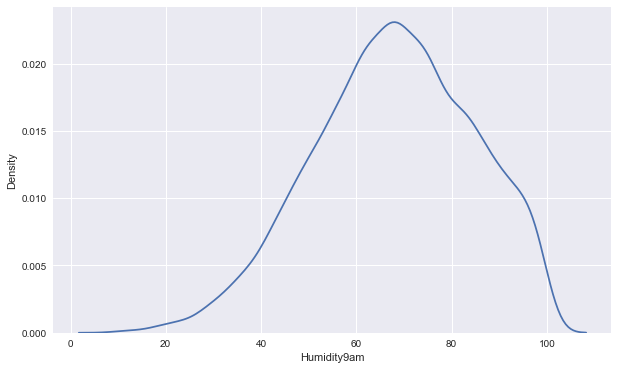

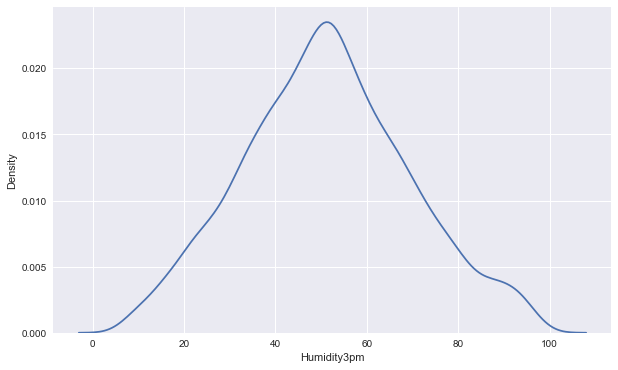

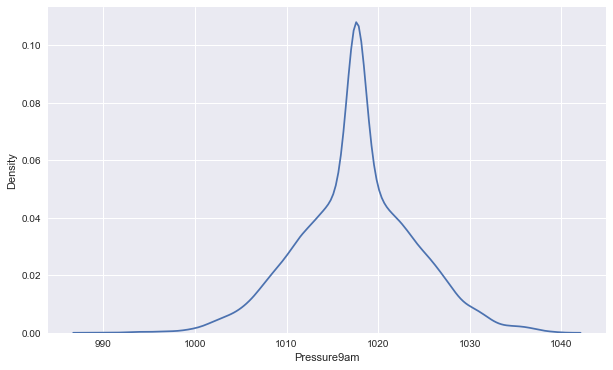

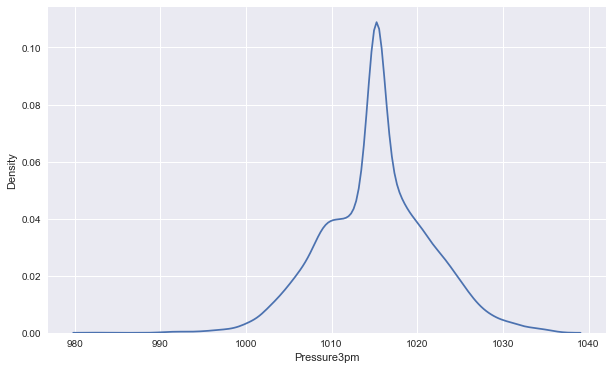

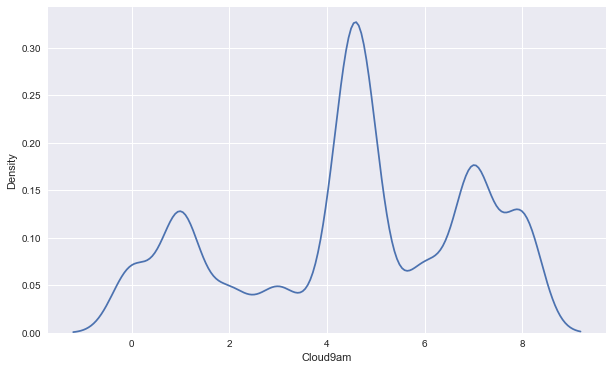

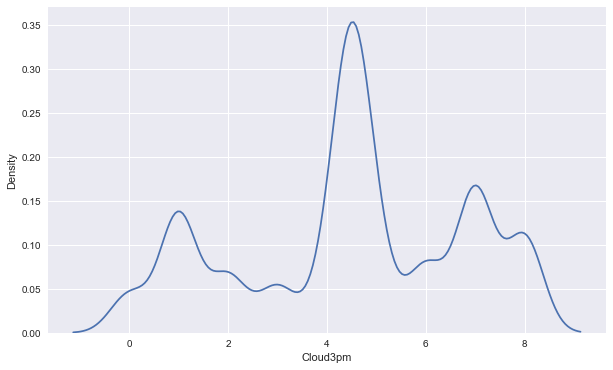

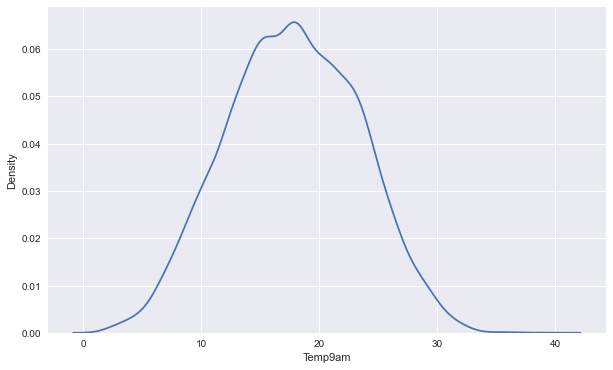

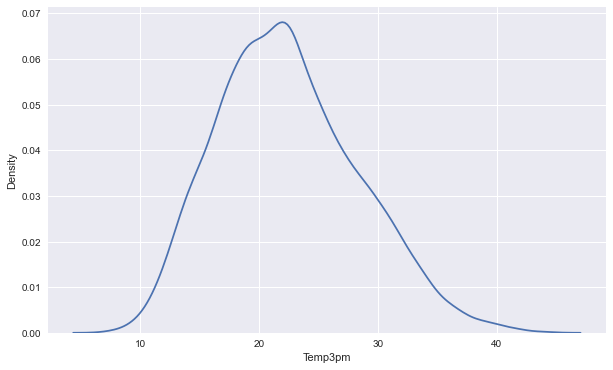

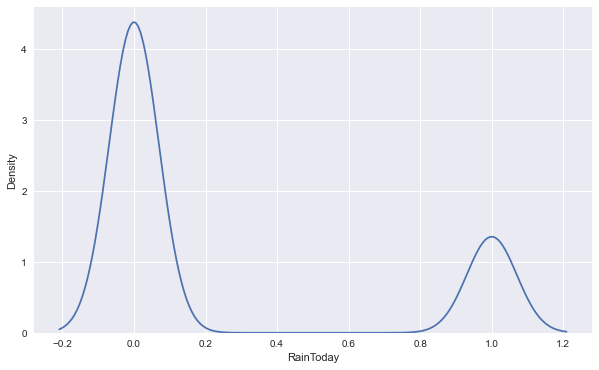

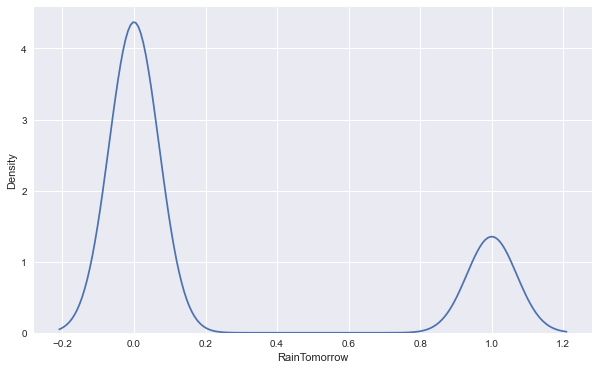

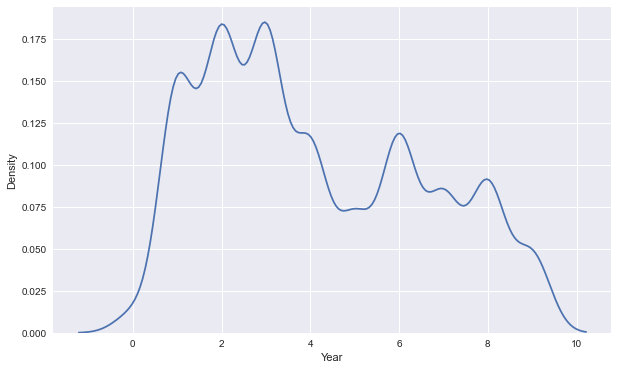

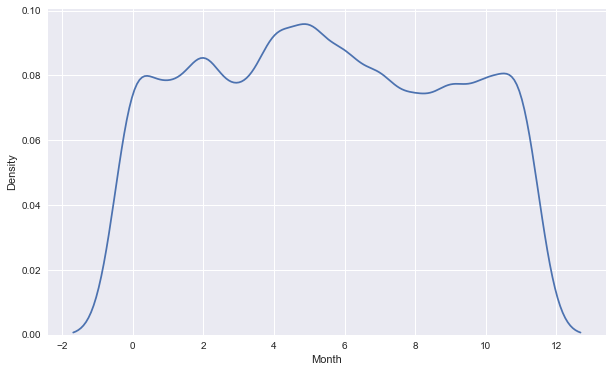

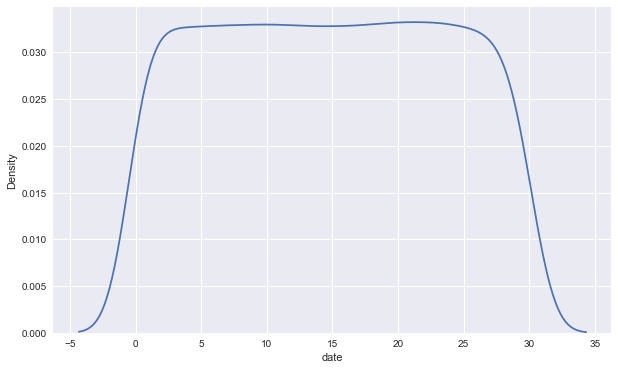

In [115]:
for i in df.columns:
    plt.figure(figsize=[10,6])
    sns.kdeplot(df[i])

In [116]:
df.skew()

Date              0.386560
Location         -0.050456
MinTemp          -0.089989
MaxTemp           0.380654
Rainfall         13.218403
Evaporation      14.023948
Sunshine         -0.716525
WindGustDir       0.119640
WindGustSpeed     0.757000
WindDir9am        0.172792
WindDir3pm       -0.119847
WindSpeed9am      0.960591
WindSpeed3pm      0.494217
Humidity9am      -0.256743
Humidity3pm       0.118281
Pressure9am      -0.024082
Pressure3pm      -0.010214
Cloud9am         -0.366503
Cloud3pm         -0.276294
Temp9am          -0.014748
Temp3pm           0.397331
RainToday         1.242362
RainTomorrow      1.241588
Year              0.418663
Month             0.039388
date              0.004260
dtype: float64

Rainfall and Evaporation have high skewness

In [117]:
#calculating the square root for data

df1 = np.sqrt(df)

df1.head(15)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,date
0,0.000000,1.0,3.660601,4.785394,0.774597,2.321507,2.762645,3.605551,6.633250,3.605551,...,31.734839,2.828427,2.122070,4.110961,4.669047,0.0,0.0,0.0,3.316625,0.000000
1,1.000000,1.0,2.720294,5.009990,0.000000,2.321507,2.762645,3.741657,6.633250,2.449490,...,31.745866,2.136966,2.122070,4.147288,4.929503,0.0,0.0,0.0,3.316625,1.000000
2,1.414214,1.0,3.591657,5.069517,0.000000,2.321507,2.762645,3.872983,6.782330,3.605551,...,31.760038,2.136966,1.414214,4.582576,4.816638,0.0,0.0,0.0,3.316625,1.414214
3,1.732051,1.0,3.033150,5.291503,0.000000,2.321507,2.762645,2.000000,4.898979,3.000000,...,31.824519,2.136966,2.122070,4.254409,5.147815,0.0,0.0,0.0,3.316625,1.732051
4,2.000000,1.0,4.183300,5.683309,1.000000,2.321507,2.762645,3.605551,6.403124,1.000000,...,31.717503,2.645751,2.828427,4.219005,5.449771,0.0,0.0,0.0,3.316625,2.000000
5,2.236068,1.0,3.820995,5.449771,0.447214,2.321507,2.762645,3.741657,7.483315,3.605551,...,31.708043,2.136966,2.122070,4.538722,5.375872,0.0,0.0,0.0,3.316625,2.236068
6,2.449490,1.0,3.781534,5.000000,0.000000,2.321507,2.762645,3.605551,7.071068,3.464102,...,31.752165,1.000000,2.122070,4.254409,4.959839,0.0,0.0,0.0,3.316625,2.449490
7,2.645751,1.0,2.774887,5.167204,0.000000,2.321507,2.762645,3.605551,5.916080,3.162278,...,31.782070,2.136966,2.122070,4.037326,5.049752,0.0,0.0,0.0,3.316625,2.645751
8,2.828427,1.0,3.114482,5.648008,0.000000,2.321507,2.762645,2.449490,8.944272,3.000000,...,31.679646,2.136966,2.122070,4.277850,5.495453,0.0,1.0,0.0,3.316625,2.828427
9,3.000000,1.0,3.619392,5.486347,1.183216,2.321507,2.762645,3.605551,5.291503,2.828427,...,31.712773,2.136966,2.122070,4.483302,5.310367,1.0,0.0,0.0,3.316625,3.000000


In [118]:
df1.skew()

Date            -0.197755
Location        -0.788341
MinTemp         -0.687792
MaxTemp          0.072631
Rainfall         2.880118
Evaporation      1.645178
Sunshine        -2.019813
WindGustDir     -0.634072
WindGustSpeed    0.176622
WindDir9am      -0.565459
WindDir3pm      -0.964248
WindSpeed9am    -0.414330
WindSpeed3pm    -0.675803
Humidity9am     -0.643079
Humidity3pm     -0.424898
Pressure9am     -0.036035
Pressure3pm     -0.022070
Cloud9am        -1.211171
Cloud3pm        -1.148150
Temp9am         -0.473358
Temp3pm          0.065561
RainToday        1.242362
RainTomorrow     1.241588
Year            -0.154346
Month           -0.826709
date            -0.710005
dtype: float64

#### SCALING

In [119]:
from sklearn.preprocessing import MinMaxScaler
df1=df
# create data
data =df1
 
# scale features
scaler = MinMaxScaler()
model=scaler.fit(data)
scaled_data=model.transform(data)
 
# print scaled features
print(scaled_data)

[[0.00000000e+00 9.09090909e-02 5.04918033e-01 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 [3.33000333e-04 9.09090909e-02 3.08196721e-01 ... 0.00000000e+00
  1.00000000e+00 3.33333333e-02]
 [6.66000666e-04 9.09090909e-02 4.88524590e-01 ... 0.00000000e+00
  1.00000000e+00 6.66666667e-02]
 ...
 [9.99333999e-01 8.18181818e-01 2.42622951e-01 ... 1.00000000e+00
  4.54545455e-01 7.33333333e-01]
 [9.99667000e-01 8.18181818e-01 3.21311475e-01 ... 1.00000000e+00
  4.54545455e-01 7.66666667e-01]
 [1.00000000e+00 8.18181818e-01 5.54098361e-01 ... 1.00000000e+00
  4.54545455e-01 8.00000000e-01]]


In [120]:
df1=df

#### Data Cleaning

In [121]:
# Getting rid of the columns with objects which will not be used in our model:
df.drop(['Date'], axis=1, inplace=True)
df.head(5)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,date
0,1,13.4,22.9,0.6,5.389395,7.632205,13,44.0,13,14,...,1007.1,8.000000,4.503183,16.9,21.8,0,0,0,11,0
1,1,7.4,25.1,0.0,5.389395,7.632205,14,44.0,6,15,...,1007.8,4.566622,4.503183,17.2,24.3,0,0,0,11,1
2,1,12.9,25.7,0.0,5.389395,7.632205,15,46.0,13,15,...,1008.7,4.566622,2.000000,21.0,23.2,0,0,0,11,2
3,1,9.2,28.0,0.0,5.389395,7.632205,4,24.0,9,0,...,1012.8,4.566622,4.503183,18.1,26.5,0,0,0,11,3
4,1,17.5,32.3,1.0,5.389395,7.632205,13,41.0,1,7,...,1006.0,7.000000,8.000000,17.8,29.7,0,0,0,11,4


#### Prediction 1:  a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

### 4.Feature Engineering

In [122]:
x= df.drop(columns='RainTomorrow')
y= df['RainTomorrow']

In [123]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [124]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=47)

#### Treating data imbalence

In [125]:
print(df['RainTomorrow'].value_counts())

0    6434
1    1991
Name: RainTomorrow, dtype: int64


In [126]:
from sklearn.utils import resample
X=pd.concat([x_train,y_train],axis=1)
label0=X[X.RainTomorrow==0]
label1=X[X.RainTomorrow==1]
label_unsampled=resample(label1,replace=True,n_samples=len(label0),random_state=27)
unsampled=pd.concat([label0,label_unsampled])
unsampled.RainTomorrow.value_counts()

0    5133
1    5133
Name: RainTomorrow, dtype: int64

In [127]:
x_train= unsampled.drop(columns='RainTomorrow')
y_train= unsampled['RainTomorrow']

In [128]:
x_train.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
Year             0
Month            0
date             0
dtype: int64

#### Scaling

In [ ]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(x_train)

# transform training data
x_train_norm = norm.transform(x_train)

# transform testing dataabs
x_test_norm = norm.transform(x_test)

In [ ]:
x_test=pd.DataFrame(x_test_norm)
x_train=pd.DataFrame(x_train_norm)

In [ ]:
x_train.describe()

In [129]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

## 5.Model construction


### RandomForestClassifier

In [130]:
clf= RandomForestClassifier().fit(x_train, y_train)
predRFC= clf.predict(x_test)
randomforest_accu=accuracy_score(y_test,predRFC)
randomforest_accu
#print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test, predRFC))
print(randomforest_accu)

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1301
           1       0.85      0.67      0.75       384

    accuracy                           0.90      1685
   macro avg       0.88      0.82      0.85      1685
weighted avg       0.90      0.90      0.90      1685

0.8997032640949555


In [131]:
from sklearn.model_selection import cross_val_score
randomforest_cv= cross_val_score(clf,x_train,y_train,scoring='accuracy', cv =3).mean()
randomforest_cv

0.9491525423728814

### SVC

In [132]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.svm import LinearSVC
svc=SVC()
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
svc_acc=accuracy_score(y_test,predsvc)
print(svc_acc)
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.7738872403560831
[[1030  271]
 [ 110  274]]
              precision    recall  f1-score   support

           0       0.90      0.79      0.84      1301
           1       0.50      0.71      0.59       384

    accuracy                           0.77      1685
   macro avg       0.70      0.75      0.72      1685
weighted avg       0.81      0.77      0.79      1685



In [133]:
svc_cv=cross_val_score(svc,x,y,scoring='accuracy', cv = 5).mean()
svc_cv

0.7642729970326408

### DecisionTreeClassifier

In [134]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()

DTC.fit(x_train,y_train)

predDTC = DTC.predict(x_test)

reportDTC = classification_report(y_test,predDTC, output_dict = True)

crDTC = pd.DataFrame(reportDTC).transpose()
dtc_acc=accuracy_score(y_test,predDTC)
print(dtc_acc)
crDTC

0.8587537091988131


,precision,recall,f1-score,support
0,0.904183,0.913912,0.909021,1301.000000
1,0.697297,0.671875,0.684350,384.000000
accuracy,0.858754,0.858754,0.858754,0.858754
macro avg,0.800740,0.792894,0.796686,1685.000000
weighted avg,0.857035,0.858754,0.857820,1685.000000


In [135]:
from sklearn.model_selection import cross_val_score
dtc_cv=cross_val_score(DTC,x,y,scoring='accuracy', cv = 10).mean()
dtc_cv

0.8349013674158854

### GaussianNB

In [136]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()

GNB.fit(x_train,y_train)

predGNB = GNB.predict(x_test)

reportGNB = classification_report(y_test, predGNB, output_dict = True)
  
crGNB = pd.DataFrame(reportGNB).transpose()
gnb_acc=accuracy_score(y_test,predGNB)
print(gnb_acc)
crGNB

0.7768545994065282


,precision,recall,f1-score,support
0,0.886383,0.815527,0.849480,1301.000000
1,0.508197,0.645833,0.568807,384.000000
accuracy,0.776855,0.776855,0.776855,0.776855
macro avg,0.697290,0.730680,0.709143,1685.000000
weighted avg,0.800197,0.776855,0.785516,1685.000000


In [137]:
gnb_cv=cross_val_score(GNB,x,y,scoring='accuracy', cv = 10).mean()
gnb_cv

0.78896064558485

### KNeighborsClassifier

In [138]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()

KNN.fit(x_train,y_train)

predKNN = KNN.predict(x_test)

reportKNN = classification_report(y_test,predKNN, output_dict = True)

crKNN = pd.DataFrame(reportKNN).transpose()
knn_acc=accuracy_score(y_test,predKNN)
print(knn_acc)
crKNN

0.7946587537091988


,precision,recall,f1-score,support
0,0.906383,0.818601,0.860258,1301.000000
1,0.537255,0.713542,0.612975,384.000000
accuracy,0.794659,0.794659,0.794659,0.794659
macro avg,0.721819,0.766071,0.736617,1685.000000
weighted avg,0.822261,0.794659,0.803904,1685.000000


In [139]:
knn_cv=cross_val_score(KNN,x,y,scoring='accuracy', cv = 10).mean()
knn_cv

0.8205380061594294

### LogisticRegression

In [140]:
from sklearn.linear_model import LogisticRegression

LReg = LogisticRegression()

LReg.fit(x_train,y_train)

predLReg = LReg.predict(x_test)

reportLReg = classification_report(y_test, predLReg, output_dict = True)

crLReg = pd.DataFrame(reportLReg).transpose()
logisticregression_acc=accuracy_score(y_test,predLReg)
print(logisticregression_acc)
print(confusion_matrix(y_test, predLReg))
crLReg

0.7833827893175074
[[1036  265]
 [ 100  284]]


,precision,recall,f1-score,support
0,0.911972,0.796311,0.850226,1301.000000
1,0.517304,0.739583,0.608789,384.000000
accuracy,0.783383,0.783383,0.783383,0.783383
macro avg,0.714638,0.767947,0.729507,1685.000000
weighted avg,0.822030,0.783383,0.795204,1685.000000


In [141]:
logisticregression_cv= cross_val_score(LReg,x,y,scoring='accuracy', cv = 10).mean()
logisticregression_cv

0.8205368790909064

#### Choosing decission tree classifier and random forest for hyper parameter tuning.

### 6.HYPER PARAMETER TUNING

In [142]:
from sklearn.metrics import r2_score
maxAcc=0
maxRS=0
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=i)
    lg=LogisticRegression(fit_intercept=True)
    lg.fit(x_train,y_train)
    pred=lg.predict(x_test)
    acc=r2_score(y_test,pred)
    print('accurancy',acc, 'random_state',i)
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
    print('accurancy',maxAcc, 'random_state',i)

print('Best accurancy is ',maxAcc, ' on random_state',maxRs)   

accurancy 0.061292758438420414 random_state 0
accurancy 0.061292758438420414 random_state 0
accurancy 0.029839883551673996 random_state 1
accurancy 0.061292758438420414 random_state 1
accurancy 0.0665739906203695 random_state 2
accurancy 0.0665739906203695 random_state 2
accurancy 0.033641036094407384 random_state 3
accurancy 0.0665739906203695 random_state 3
accurancy 0.031825093995222264 random_state 4
accurancy 0.0665739906203695 random_state 4
accurancy 0.03843105229025068 random_state 5
accurancy 0.0665739906203695 random_state 5
accurancy 0.04672854913020208 random_state 6
accurancy 0.0665739906203695 random_state 6
accurancy 0.019366841746329966 random_state 7
accurancy 0.0665739906203695 random_state 7
accurancy 0.023431867339581802 random_state 8
accurancy 0.0665739906203695 random_state 8
accurancy 0.05322122451466482 random_state 9
accurancy 0.0665739906203695 random_state 9
accurancy 0.04492163491087908 random_state 10
accurancy 0.0665739906203695 random_state 10
accurancy 

In [143]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=11)

#### 1. RandomForestClassifier

In [144]:
rfc=RandomForestClassifier()
param_grid={
    'criterion' : ["gini", "entropy"],
    'n_estimators':[200,1000,50],
    'min_samples_split':[2,3,4],
     'random_state':[10]              
}

In [145]:
from sklearn.model_selection import GridSearchCV
rf=GridSearchCV(RandomForestClassifier(),param_grid,cv=4,scoring='accuracy',n_jobs=-1,verbose=2)
rf.fit(x_train,y_train)

Fitting 4 folds for each of 18 candidates, totalling 72 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [200, 1000, 50],
                         'random_state': [10]},
             scoring='accuracy', verbose=2)

In [146]:
rf.best_params_

{'criterion': 'entropy',
 'min_samples_split': 2,
 'n_estimators': 1000,
 'random_state': 10}

In [147]:
clf= RandomForestClassifier(criterion='entropy',min_samples_split=2,n_estimators=1000,random_state=10).fit(x_train, y_train)
fianlRFC= clf.predict(x_test)
randomforest_accu=accuracy_score(y_test,fianlRFC)
randomforest_accu
#print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test, fianlRFC))
print(randomforest_accu)

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1294
           1       0.88      0.67      0.76       391

    accuracy                           0.90      1685
   macro avg       0.89      0.82      0.85      1685
weighted avg       0.90      0.90      0.90      1685

0.9020771513353115


In [148]:
randomforest_cv= cross_val_score(clf,x,y,scoring='accuracy', cv = 3).mean()
randomforest_cv 

0.8339524851777136

### 2.DecisionTreeClassifier

In [149]:
from sklearn.model_selection import GridSearchCV
parameter ={ 'max_depth': np.arange(2,10),'criterion':['gini','entropy'],'splitter':['best', 'random'],'max_depth': [6,7,8,9,10],
'min_samples_leaf': [2,3,4,5,6,7],
'min_samples_split': [2,3,4,5,6,7]}
GCV=GridSearchCV(DecisionTreeClassifier(),parameter,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 7, 8, 9, 10],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7],
                         'min_samples_split': [2, 3, 4, 5, 6, 7],
                         'splitter': ['best', 'random']})

In [150]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'splitter': 'best'}

In [151]:
from sklearn.tree import DecisionTreeClassifier
final_mod=DecisionTreeClassifier(criterion='gini',splitter= 'best',random_state = 11,max_depth=9,min_samples_leaf= 2, min_samples_split= 5)
final_mod.fit(x_train,y_train)
pred=final_mod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc)

0.8433234421364986


In [152]:
from sklearn.model_selection import cross_val_score
dtc_cv=cross_val_score(final_mod,x,y,scoring='accuracy', cv = 5).mean()
dtc_cv

0.7969139465875371

#### The best model after Hyper parameter tuning is RandomForestClassifier with 86% accuracy

### 7.Evaluation

#### roc_auc_score

In [153]:
# train models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# RandomForestClassifier
model1 = RandomForestClassifier()
# DecisionTreeClassifier
model2 = DecisionTreeClassifier()

# fit model
model1.fit(x_train, y_train)
model2.fit(x_train, y_train)

# predict probabilities
pred_prob1 = model1.predict_proba(x_test)
pred_prob2 = model2.predict_proba(x_test)

In [154]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [155]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])

print(auc_score1, auc_score2)

0.9492147507480917 0.7958371709681117


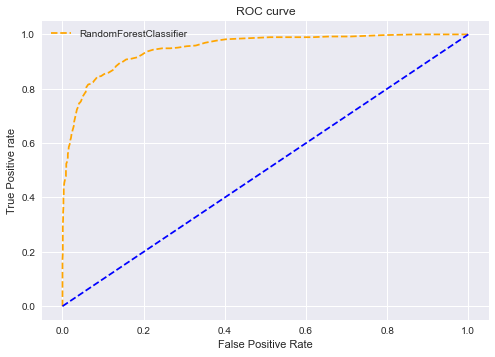

In [156]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='RandomForestClassifier')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

### 8.Saving the model

In [157]:
import joblib
joblib.dump(fianlRFC,"final model.pkl")

['final model.pkl']

#### Prediction 2:b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.

### Feature Engineering

In [158]:
x= df.drop(columns='Rainfall')
y= df['Rainfall']

In [159]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=47)

In [160]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

#### finding best random_state

In [161]:
from sklearn.metrics import r2_score
d=5
for i in range(0,100):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=i)
    lm=LinearRegression()
    lm.fit(x_train,y_train)
    pred_train=lm.predict(x_train)
    pred_test = lm.predict(x_test)
    a=r2_score(y_train,pred_train)
    b=r2_score(y_test,pred_test)
    c=a-b
    print(i,c)
    if d>=c:
        d=c
        print("least value",i,d)

0 -0.06895550277375906
least value 0 -0.06895550277375906
1 -0.004758360203717449
2 0.07322555623009752
3 0.03998459216427852
4 -0.05874070144620103
5 -0.026784267588754518
6 -0.10049019102512002
least value 6 -0.10049019102512002
7 -0.031960316010966716
8 0.10379623794635895
9 0.11063738142066326
10 0.05387760083873183
11 0.04513873787215561
12 -0.1169882364792435
least value 12 -0.1169882364792435
13 0.01516209578303207
14 -0.017351989076401786
15 -0.05665554068767242
16 0.059903294520874395
17 0.002159160727042919
18 0.044362873513837164
19 0.09418287667183511
20 -0.022013895505265557
21 0.055604169326721964
22 -0.08770176728013401
23 -0.06238313561716813
24 0.03656215860603762
25 -0.09383075198374302
26 -0.022546930948608046
27 -0.01072505028570192
28 -0.036827408396124195
29 -0.023119384038646773
30 -0.13469923719212362
least value 30 -0.13469923719212362
31 -0.08737885505251497
32 -0.01779398631804785
33 -0.10486042402365447
34 -0.053214358824584584
35 0.05287280477949652
36 0.07

In [162]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=30)

## Model Construction

### 1.LinearRegression

In [163]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [164]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [165]:
predictions=lm.predict(x_test)

In [166]:
import numpy as np
from sklearn import metrics
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,predictions))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,predictions))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,predictions))

Mean Absolute Error:  3.0166698372957708
Mean Squared Error:  38.46844677910856
Root Mean Squared Error:  6.202293670821187
Explained Variance Score:  0.36037082241774676


In [167]:
lr_cv=cross_val_score(lm,x,y, cv = 6).mean()
lr_cv

0.2429268128374864

### 2. RandomForestRegressor

In [168]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [169]:
predictions1=rf.predict(x_test)

In [170]:
import numpy as np
from sklearn import metrics
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,predictions1))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,predictions1))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,predictions1)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,predictions1))
print('r2_score:',r2_score(y_test,predictions1))

Mean Absolute Error:  1.8943710006543786
Mean Squared Error:  34.630141375407774
Root Mean Squared Error:  5.88473800397331
Explained Variance Score:  0.42785775262426295
r2_score: 0.42348145053344743


In [171]:
rfr_cv=cross_val_score(rf,x,y, cv = 9).mean()
rfr_cv

0.4620291067205421

### 3.SVR

In [172]:
from sklearn.svm import SVR

svr=SVR()
svr.fit(x_train,y_train)
print(svr.score(x_train,y_train))
svr_predict=svr.predict(x_test)

-0.052890811525972525


In [173]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,svr_predict))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,svr_predict))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,svr_predict)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,svr_predict))
print('r2_score:',r2_score(y_test,svr_predict))

Mean Absolute Error:  2.7005929026526228
Mean Squared Error:  65.75335040576564
Root Mean Squared Error:  8.108843962351578
Explained Variance Score:  0.013748197603488777
r2_score: -0.09465409879666131


In [174]:
svr_cv=cross_val_score(svr,x,y, cv = 4).mean()
svr_cv

-0.06586308008332192

### 4.DecisionTreeRegressor

In [175]:
from sklearn.tree import DecisionTreeRegressor

DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
print(DTR.score(x_train,y_train))
DTR_PRED=DTR.predict(x_test)

1.0


In [176]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,DTR_PRED))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,DTR_PRED))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,DTR_PRED)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,DTR_PRED))
print('r2_score:',r2_score(y_test,DTR_PRED))

Mean Absolute Error:  1.845443017461558
Mean Squared Error:  60.192152922121494
Root Mean Squared Error:  7.758360195435727
Explained Variance Score:  -0.0017786032319266898
r2_score: -0.0020719325325533333


In [177]:
#Now lets try to do some evaluation for decision tree model using cross validation.

dt_cv = cross_val_score(estimator = DTR, X = x_train, y = y_train, cv = 10)
dt_cv.mean()

-0.26977971228545883

### 5.GradientBoostingRegressor

In [178]:
from sklearn.ensemble import GradientBoostingRegressor

GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
print(GBR.score(x_train,y_train))
GBR_PRED=GBR.predict(x_test)

0.6902007021596477


In [179]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,GBR_PRED))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,GBR_PRED))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,GBR_PRED)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,GBR_PRED))
print('r2_score:',r2_score(y_test,GBR_PRED))

Mean Absolute Error:  2.446084810589803
Mean Squared Error:  42.20961499016947
Root Mean Squared Error:  6.4968927180745
Explained Variance Score:  0.29957086925660437
r2_score: 0.2972992589353062


In [180]:
GBR_cv=cross_val_score(GBR,x,y, cv = 8).mean()
GBR_cv

0.44567137536802115

### 6.Ridge

In [181]:
from sklearn.linear_model import Ridge

R=Ridge()
R.fit(x_train,y_train)
print(R.score(x_train,y_train))
R_predict=R.predict(x_test)

0.22488241815085452


In [182]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,R_predict))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,R_predict))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,R_predict)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,R_predict))
print('r2_score:',r2_score(y_test,R_predict))

Mean Absolute Error:  3.0165908981363563
Mean Squared Error:  38.46604998449851
Root Mean Squared Error:  6.202100449404098
Explained Variance Score:  0.36041000394428246
r2_score: 0.3596216919715114


In [183]:
R_cv=cross_val_score(R,x,y, cv = 7).mean()
R_cv

0.22776361753297195

#### After evaluating the model based on MAE,MSE,RMSE,EVS,R2 SCORE the best models choosen for Final model is RandomForestRegressor

In [184]:
print("FINAL MODEL")
print("-----------------------------------------")
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,predictions1))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,predictions1))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,predictions1)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,predictions1))
print('r2_score:',r2_score(y_test,predictions1))

FINAL MODEL
-----------------------------------------
Mean Absolute Error:  1.8943710006543786
Mean Squared Error:  34.630141375407774
Root Mean Squared Error:  5.88473800397331
Explained Variance Score:  0.42785775262426295
r2_score: 0.42348145053344743


<AxesSubplot:xlabel='Rainfall', ylabel='Density'>

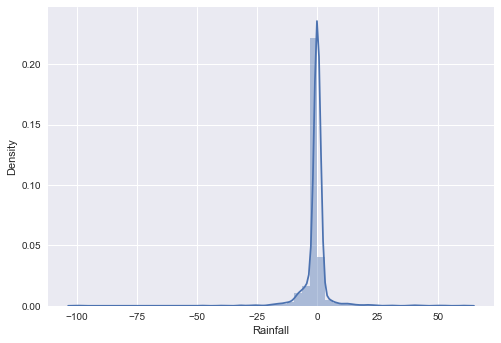

In [185]:
sns.distplot(y_test-predictions1)

### SAVING THE MODEL

In [188]:
import joblib
joblib.dump(rf,"final model.pkl")

['final model.pkl']